In [6]:
import numpy as np
import matplotlib.pyplot as plt


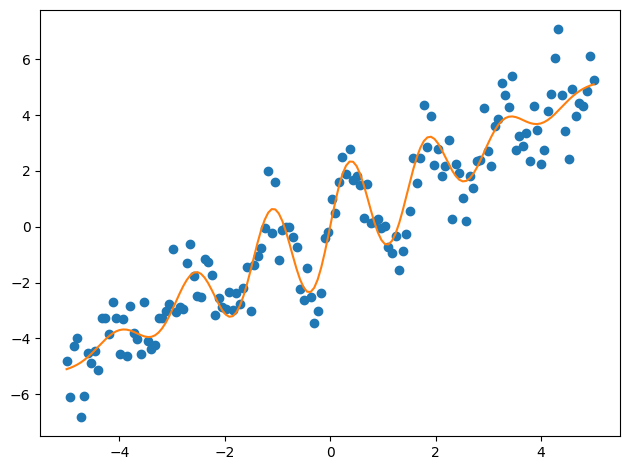

In [7]:
# Let us generate data points from a relatively complicated function
N = 150
alpha, sigma = 2., 3.
X = np.linspace(-5, 5, num=N)
y = X + (alpha * np.sin((4 * np.pi * X) / sigma) * np.exp(-(X ** 2) / (sigma ** 2)))
# Add some random noise
rng = np.random.default_rng(42)
y_noisy = y + rng.standard_normal(N)
# Show the data points
plt.plot(X, y_noisy, 'o')
plt.plot(X, y)
plt.tight_layout()

train shape: (112,)
test shape: (38,)
train y shape: (112,)
test y shape: (38,)


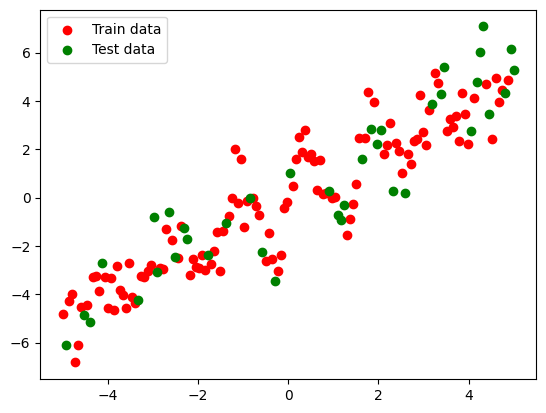

In [8]:
data = np.vstack((X, y))
# Get permuted indices
permuted_indices = rng.permutation(len(X))

# Apply the permutation to both X and y
X_permuted = X[permuted_indices]
y_permuted = y_noisy[permuted_indices]

train_ratio = 0.75
len_data = len(X)
train_size = int(len_data * train_ratio)
X_train = X_permuted[:train_size].flatten()
X_test = X_permuted[train_size:].flatten()
y_train = y_permuted[:train_size].flatten()
y_test = y_permuted[train_size:].flatten()

print(f"train shape: {X_train.shape}")
print(f"test shape: {X_test.shape}")
print(f"train y shape: {y_train.shape}")
print(f"test y shape: {y_test.shape}")

plt.scatter(X_train, y_train, color='red', label='Train data')
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.legend()
plt.show()

GeneticNN(
  (layers): ModuleList(
    (0): Linear(in_features=1, out_features=1, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1, out_features=1, bias=True)
    (3): Sigmoid()
  )
)
500
500


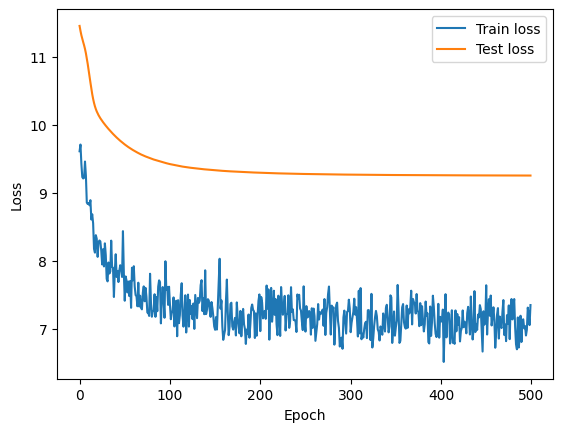

In [9]:
from model import GeneticNN
import torch

DNA = [1, 1, 1]
model = GeneticNN(DNA)
print(model)

criterion = torch.nn.MSELoss() #@param
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) #@param
epochs = 500 #@param

# Convert numpy arrays to torch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Create TensorDataset and DataLoader for training and testing
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Train the model
train_losses, test_losses = model.train_model(train_loader, test_loader, criterion, optimizer, epochs)


print(len(train_losses))
print(len(test_losses))

plt.plot([ i for i in range(len(train_losses)) ], train_losses, label='Train loss')
plt.plot([ i for i in range(len(train_losses)) ], test_losses, label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Generation 1
[[1, 64, 64, 32, 16, 32, 128, 32, 1], [1, 2, 64, 2, 4, 128, 128, 16, 1], [1, 16, 32, 128, 2, 64, 128, 16, 128, 1], [1, 128, 32, 128, 64, 1], [1, 2, 4, 1], [1, 8, 4, 8, 16, 4, 8, 32, 1], [1, 8, 128, 16, 128, 32, 32, 1], [1, 32, 128, 128, 128, 64, 16, 16, 64, 1], [1, 2, 1], [1, 1]]


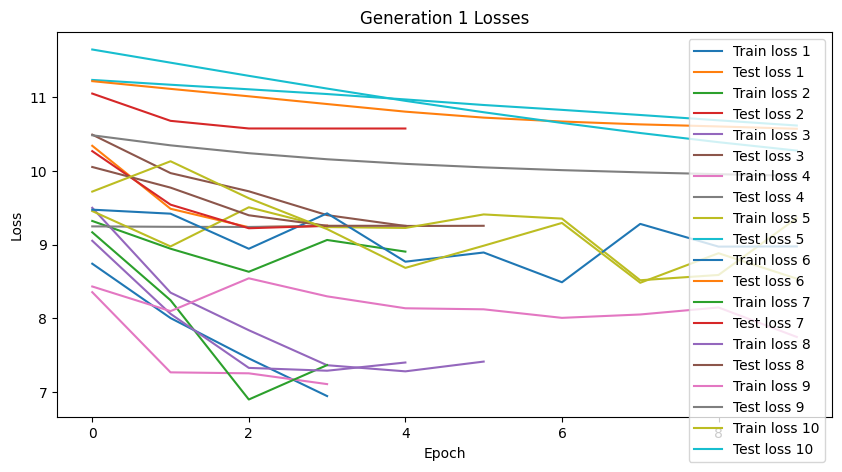

Generation 1, Best Fitness: -11.7719

Generation 2
[[1, 2, 64, 2, 4, 128, 16, 1], [1, 8, 4, 8, 16, 128, 8, 32, 1], [1, 2, 64, 128, 2, 64, 16, 16, 64, 1], [1, 32, 4, 1]]


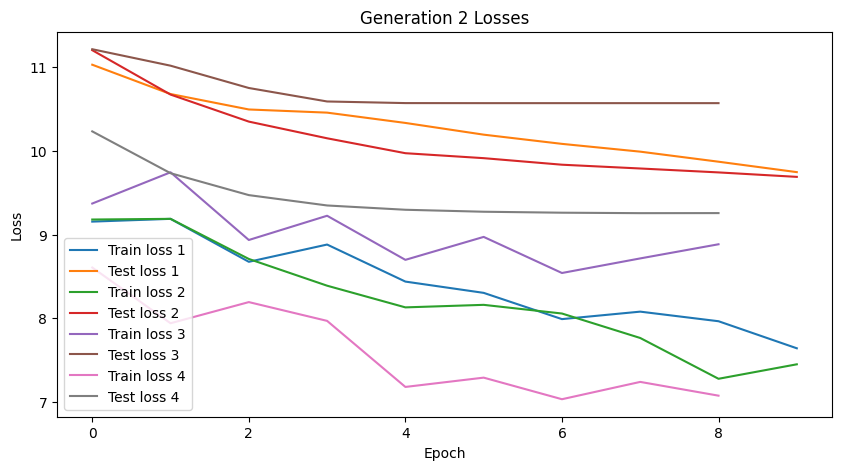

Generation 2, Best Fitness: -11.8513

Generation 3
[[1, 2, 32, 8, 16, 128, 8, 32, 1], [1, 8, 64, 128, 64, 64, 16, 16, 64, 1], [1, 32, 4, 1], [1, 2, 64, 2, 4, 128, 16, 1]]


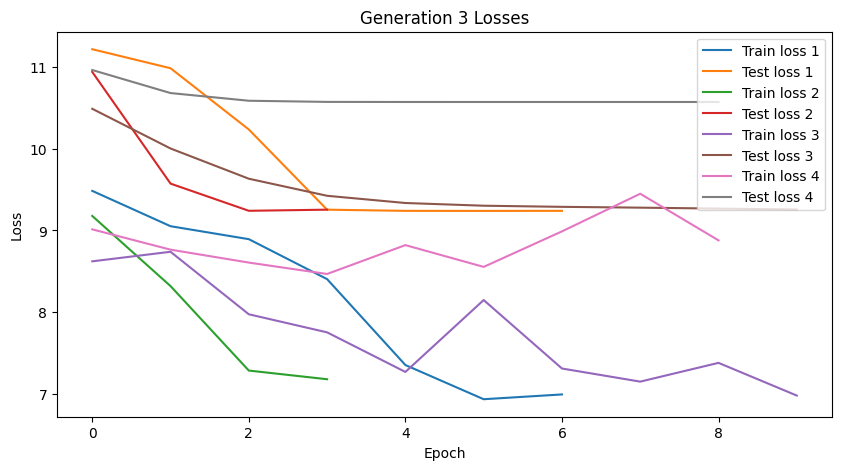

Generation 3, Best Fitness: -11.5845

Generation 4
[[1, 2, 64, 16, 64, 64, 16, 16, 64, 1], [1, 8, 128, 2, 4, 128, 16, 1], [1, 2, 1], [1, 32, 32, 8, 16, 128, 2, 32, 1]]


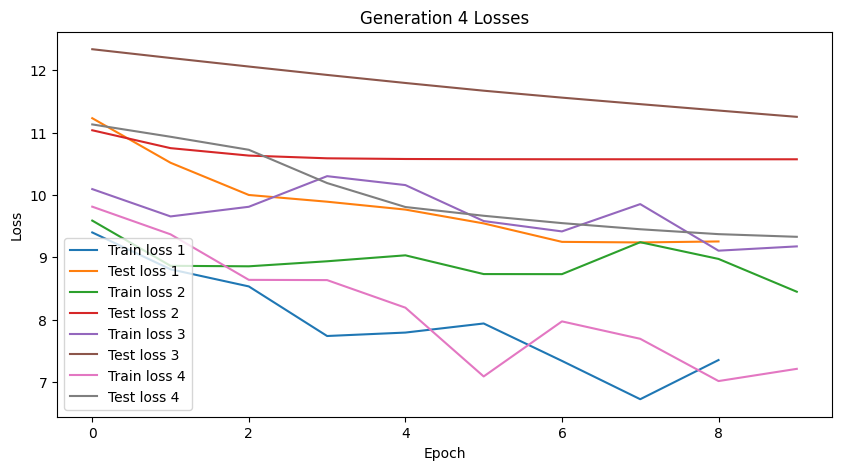

Generation 4, Best Fitness: -11.6531

Generation 5
[[1, 8, 1], [1, 2, 128, 2, 4, 128, 64, 1], [1, 2, 32, 8, 8, 128, 2, 32, 1], [1, 32, 64, 16, 64, 64, 16, 16, 64, 1]]


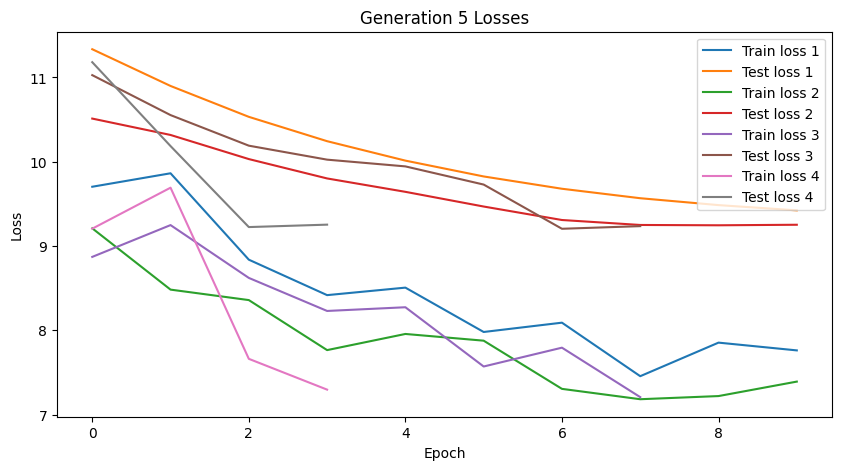

Generation 5, Best Fitness: -10.5181

Generation 6
[[1, 32, 64, 16, 64, 64, 16, 1], [1, 2, 128, 2, 4, 64, 2, 16, 64, 1], [1, 2, 1], [1, 8, 128, 128, 8, 128, 2, 32, 1]]


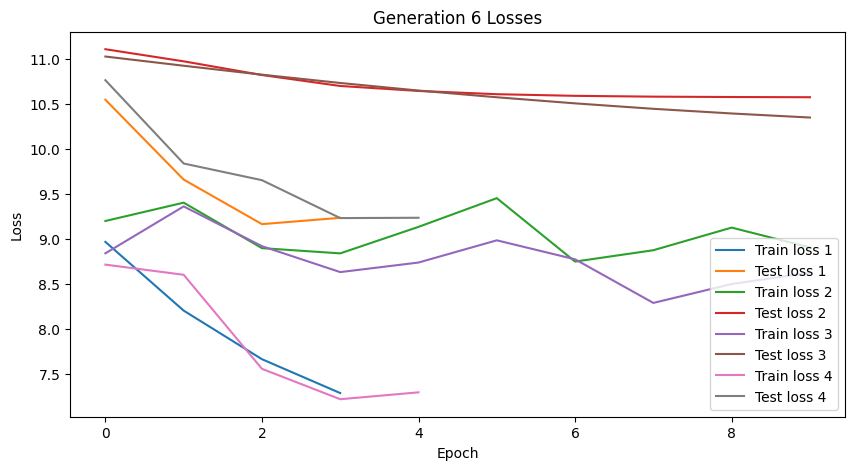

Generation 6, Best Fitness: -11.7983

Generation 7
[[1, 2, 1], [1, 2, 128, 2, 4, 64, 2, 16, 64, 1], [1, 64, 64, 16, 64, 64, 16, 1], [1, 8, 128, 2, 8, 128, 2, 32, 1]]


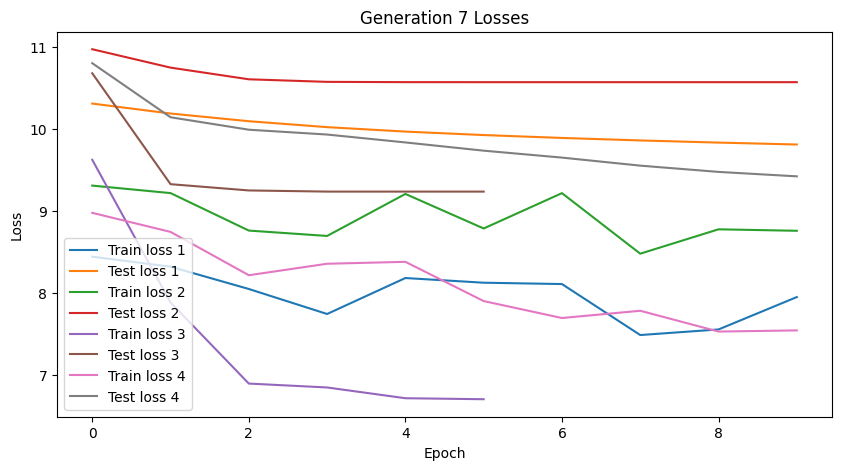

Generation 7, Best Fitness: -11.7935

Generation 8
[[1, 2, 128, 2, 8, 128, 2, 32, 1], [1, 8, 128, 2, 4, 2, 2, 16, 1], [1, 2, 1], [1, 64, 64, 16, 64, 64, 16, 1]]


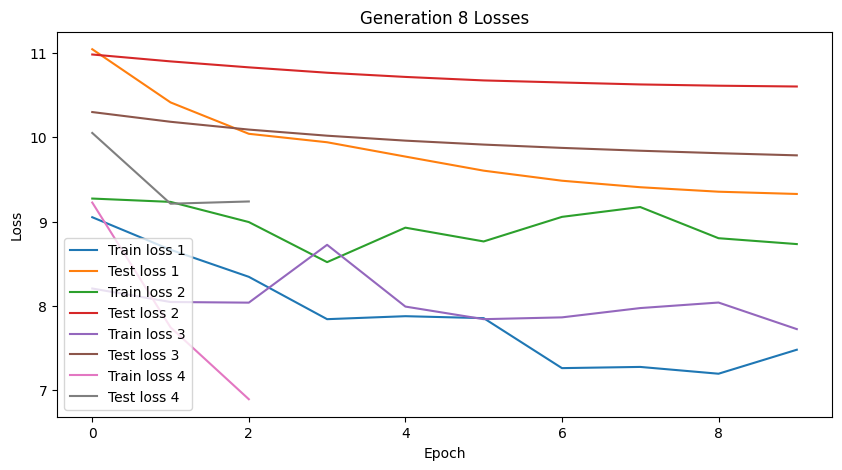

Generation 8, Best Fitness: -11.6457

Generation 9
[[1, 8, 128, 2, 4, 2, 2, 32, 1], [1, 2, 128, 2, 8, 128, 2, 16, 1], [1, 64, 1], [1, 2, 64, 16, 64, 64, 16, 1]]


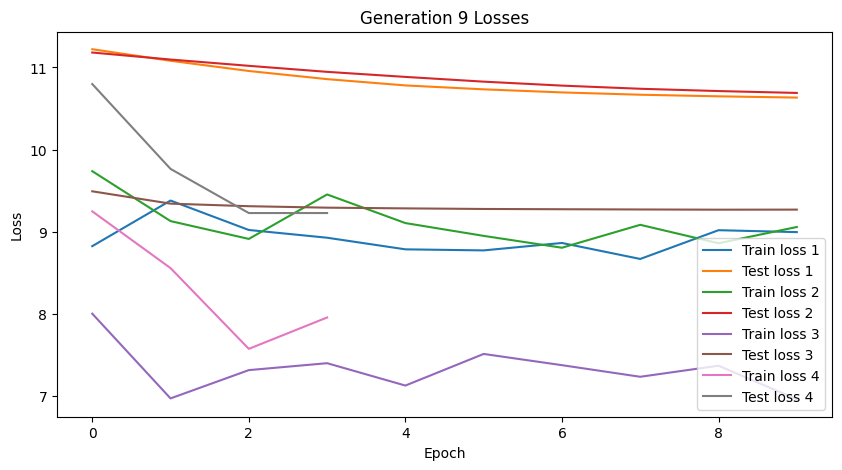

Generation 9, Best Fitness: -11.8397

Generation 10
[[1, 2, 128, 2, 4, 2, 2, 32, 1], [1, 8, 128, 2, 8, 128, 2, 16, 1], [1, 64, 1], [1, 128, 64, 16, 64, 64, 16, 1]]


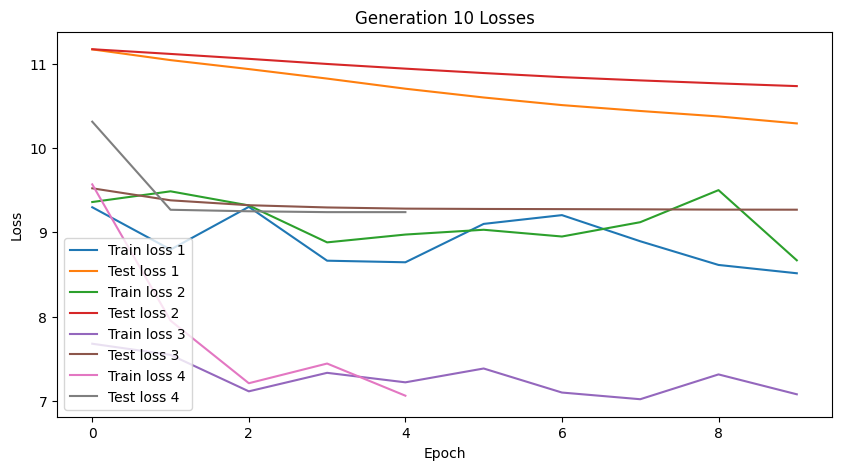

Generation 10, Best Fitness: -11.8882

Generation 11
[[1, 8, 128, 2, 8, 128, 2, 16, 1], [1, 2, 128, 8, 4, 2, 2, 32, 1], [1, 128, 1], [1, 4, 64, 16, 64, 64, 16, 1]]


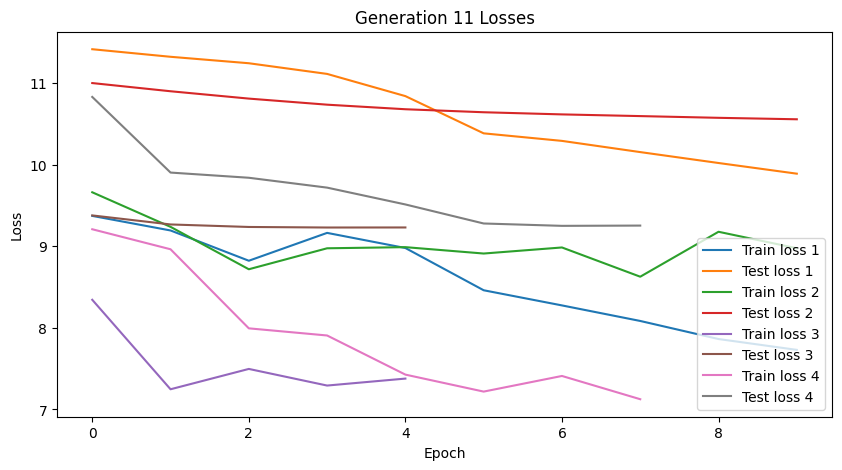

Generation 11, Best Fitness: -11.6136

Generation 12
[[1, 2, 128, 8, 8, 128, 2, 16, 1], [1, 8, 128, 2, 4, 2, 2, 32, 1], [1, 4, 1], [1, 128, 64, 16, 64, 64, 16, 1]]


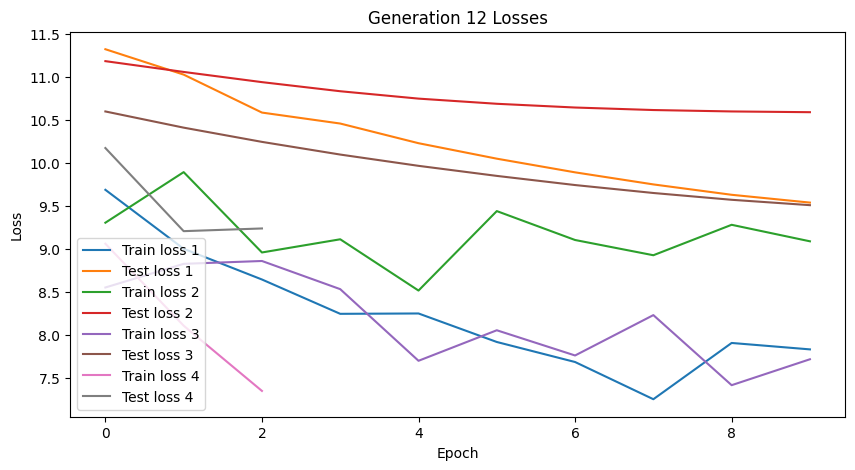

Generation 12, Best Fitness: -11.6451

Generation 13
[[1, 8, 128, 8, 4, 128, 2, 16, 1], [1, 2, 128, 2, 2, 2, 32, 1], [1, 4, 1], [1, 128, 16, 64, 64, 16, 1]]


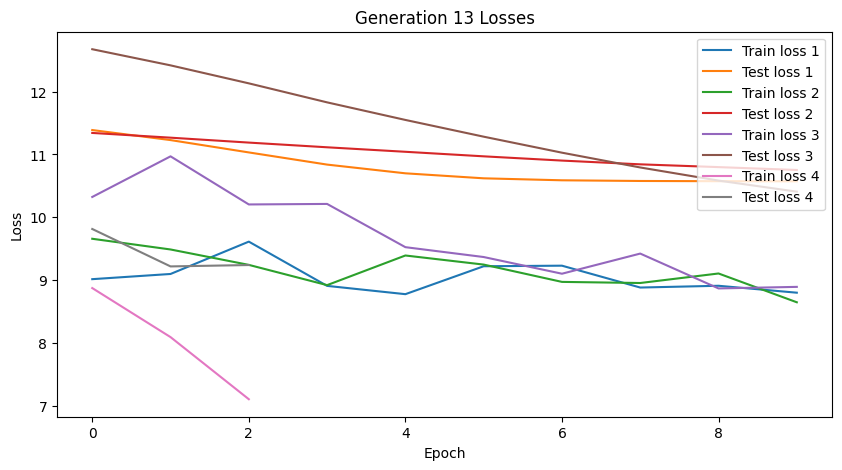

Generation 13, Best Fitness: -11.7300

Generation 14
[[1, 8, 128, 2, 2, 2, 32, 1], [1, 64, 128, 8, 4, 128, 2, 16, 1], [1, 128, 16, 64, 64, 16, 1], [1, 4, 1]]


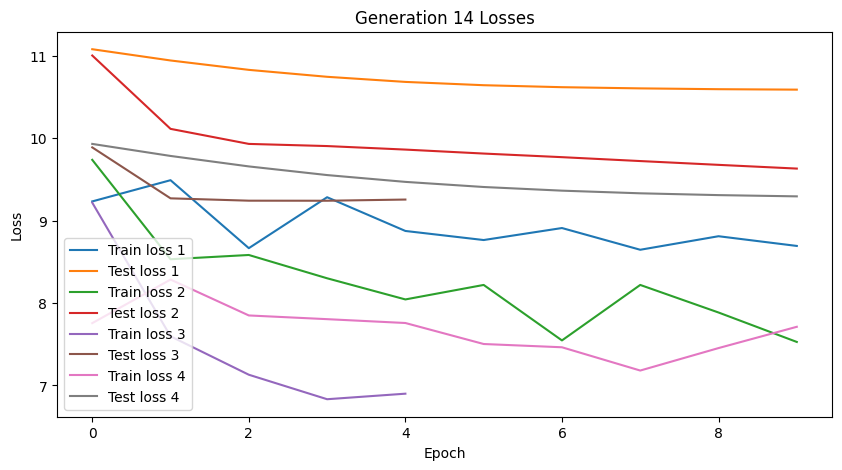

Generation 14, Best Fitness: -11.5588

Generation 15
[[1, 8, 128, 16, 4, 128, 2, 2, 1], [1, 64, 128, 2, 2, 2, 1], [1, 4, 1], [1, 128, 16, 64, 64, 16, 1]]


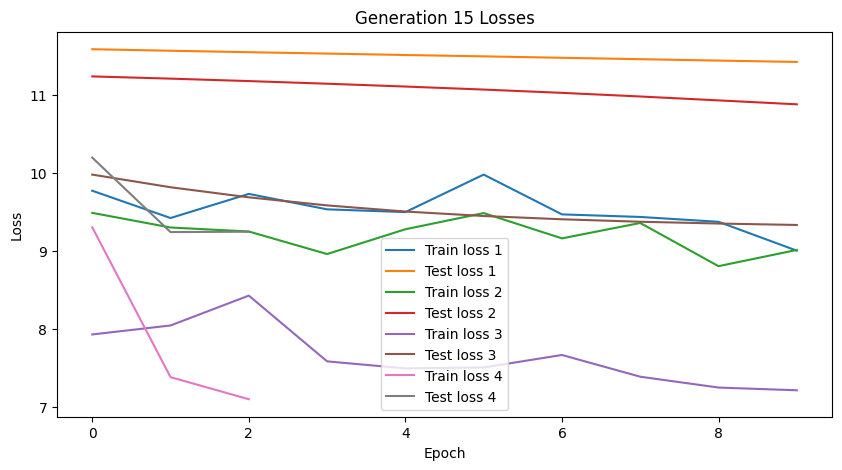

Generation 15, Best Fitness: -12.5713

Generation 16
[[1, 8, 16, 4, 16, 1], [1, 64, 128, 2, 2, 128, 2, 2, 1], [1, 4, 1], [1, 128, 16, 64, 32, 16, 1]]


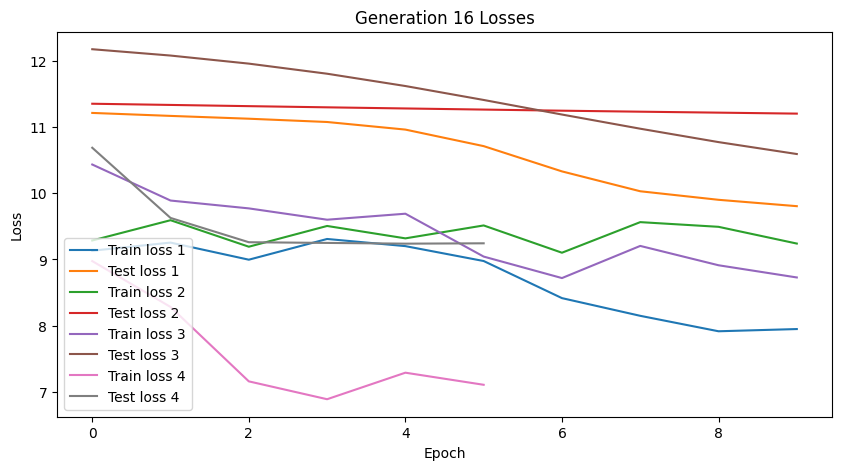

Generation 16, Best Fitness: -12.3865

Generation 17
[[1, 4, 1], [1, 64, 128, 2, 2, 128, 64, 2, 1], [1, 8, 16, 4, 32, 16, 1], [1, 128, 16, 64, 16, 1]]


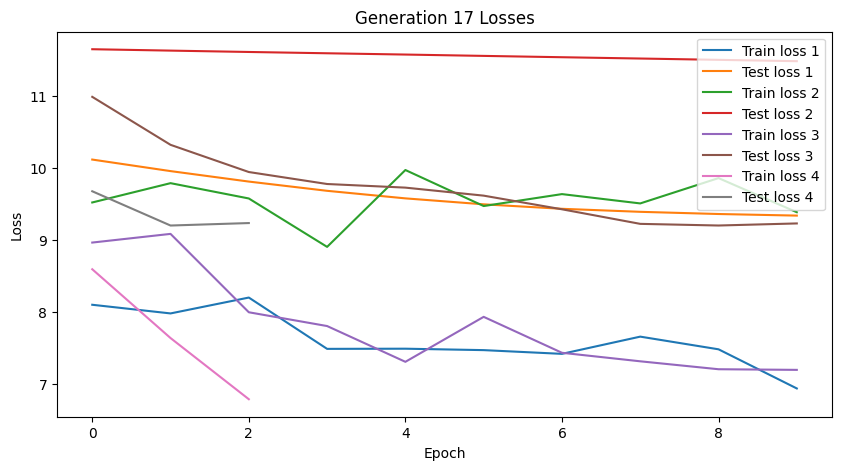

Generation 17, Best Fitness: -12.7216

Generation 18
[[1, 64, 128, 2, 16, 1], [1, 128, 16, 64, 2, 128, 64, 2, 1], [1, 4, 1], [1, 8, 16, 4, 32, 16, 1]]


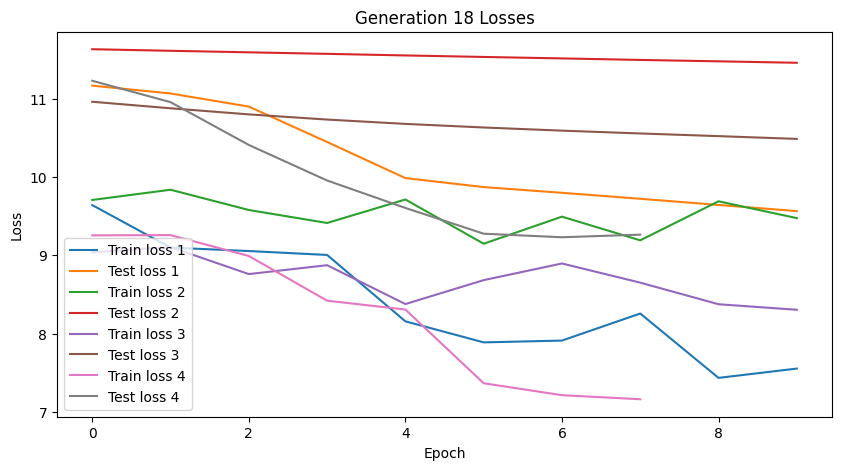

Generation 18, Best Fitness: -12.7112

Generation 19
[[1, 128, 1], [1, 16, 64, 128, 128, 64, 2, 1], [1, 64, 128, 64, 16, 16, 1], [1, 8, 16, 4, 32, 1]]


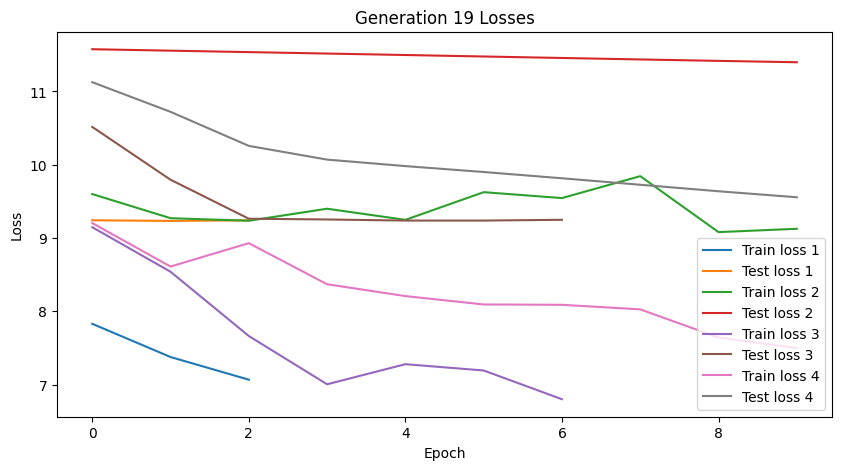

Generation 19, Best Fitness: -12.5930

Generation 20
[[1, 16, 64, 128, 128, 16, 1], [1, 64, 128, 64, 16, 64, 2, 1], [1, 128, 1], [1, 8, 16, 4, 32, 1]]


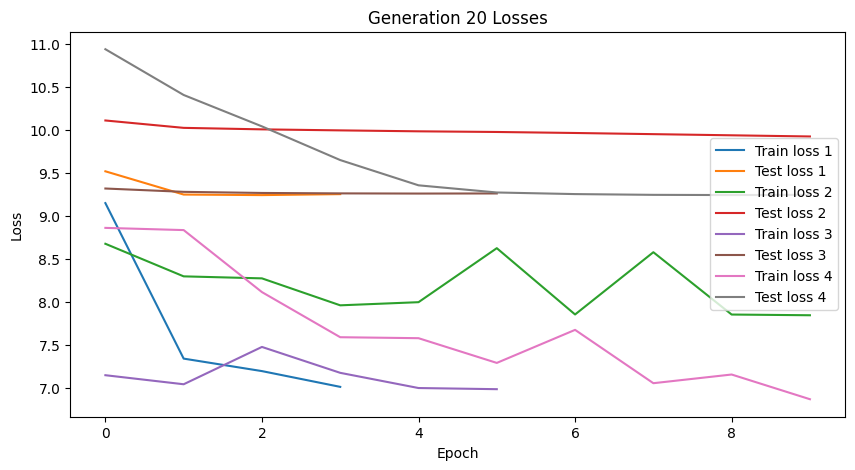

Generation 20, Best Fitness: -11.0580

Generation 21
[[1, 64, 128, 64, 128, 16, 1], [1, 16, 64, 128, 16, 64, 2, 1], [1, 8, 1], [1, 128, 16, 4, 32, 1]]


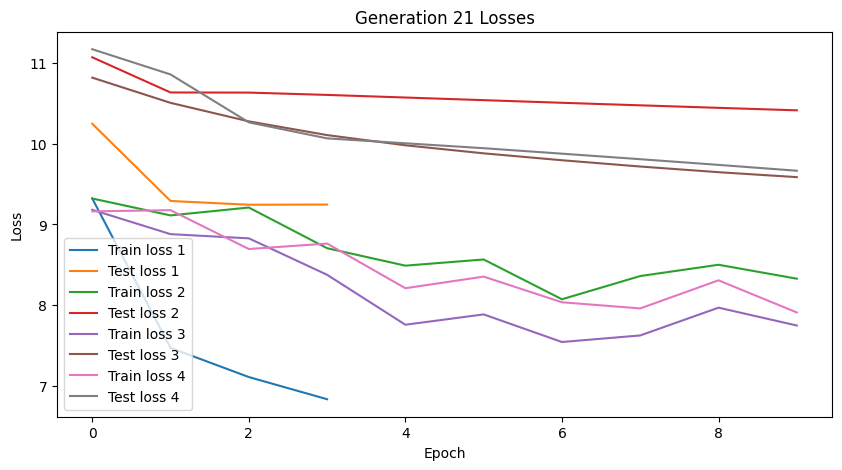

Generation 21, Best Fitness: -11.4985

Generation 22
[[1, 16, 128, 128, 32, 1], [1, 128, 16, 4, 16, 64, 2, 1], [1, 8, 1], [1, 64, 128, 64, 128, 16, 1]]


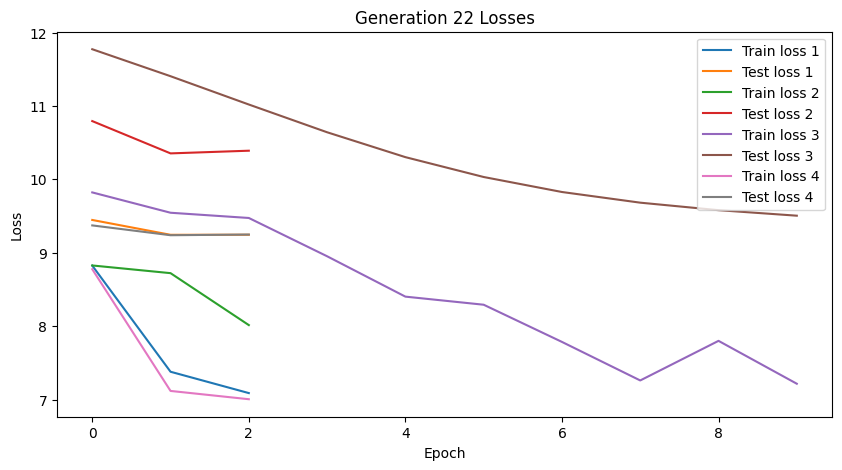

Generation 22, Best Fitness: -11.4174

Generation 23
[[1, 128, 16, 64, 128, 16, 1], [1, 64, 16, 4, 16, 64, 4, 1], [1, 16, 1], [1, 8, 128, 32, 1]]


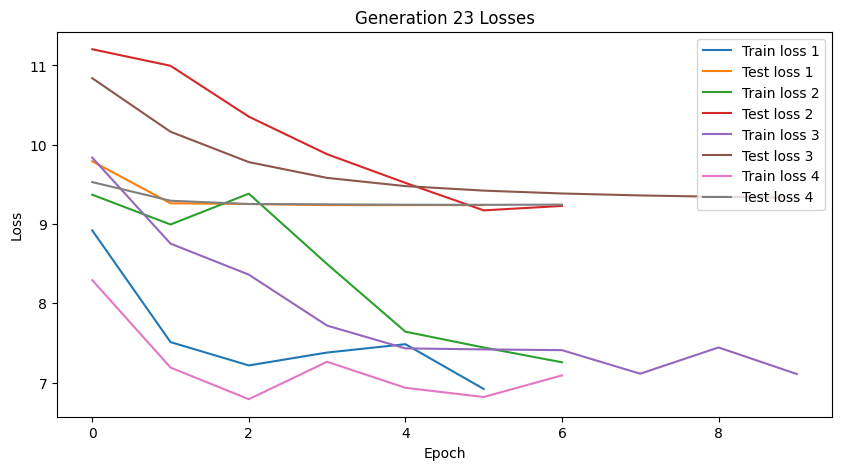

Generation 23, Best Fitness: -10.3334

Generation 24
[[1, 128, 16, 64, 16, 64, 4, 1], [1, 64, 16, 4, 128, 16, 1], [1, 8, 1], [1, 4, 128, 16, 1]]


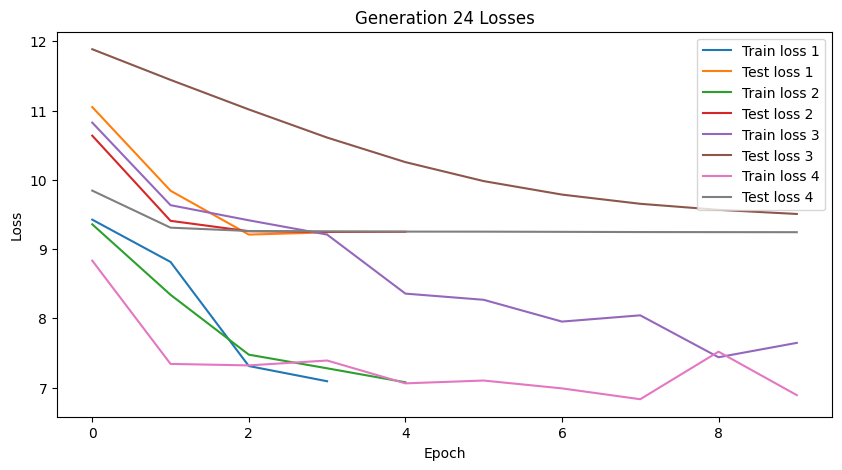

Generation 24, Best Fitness: -10.3288

Generation 25
[[1, 64, 16, 2, 128, 16, 1], [1, 128, 16, 64, 16, 64, 4, 1], [1, 8, 1], [1, 4, 128, 16, 1]]


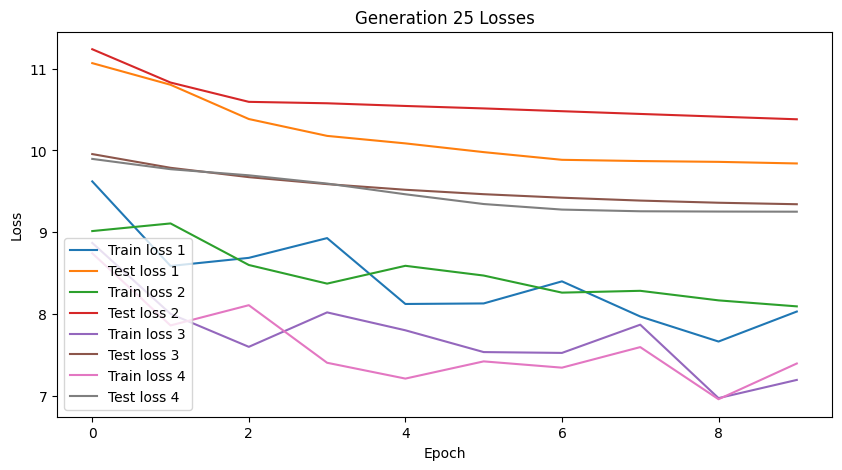

Generation 25, Best Fitness: -11.4685

Generation 26
[[1, 128, 16, 64, 128, 16, 1], [1, 64, 16, 2, 2, 64, 4, 1], [1, 8, 1], [1, 4, 128, 16, 1]]


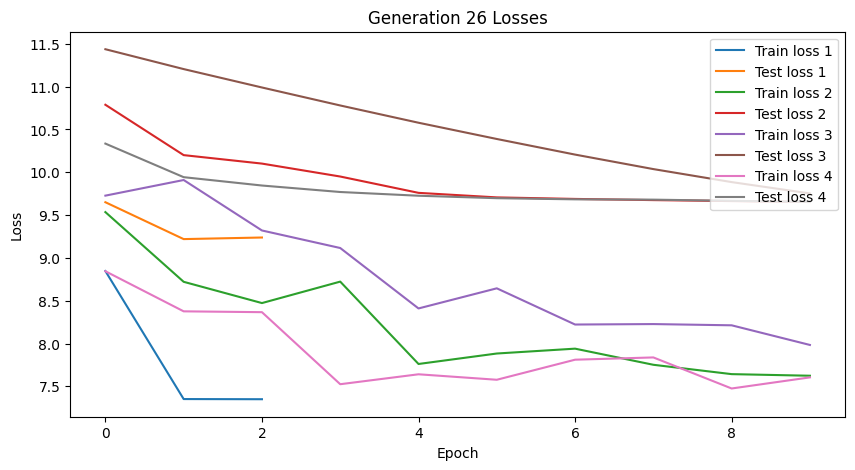

Generation 26, Best Fitness: -10.6035

Generation 27
[[1, 64, 16, 16, 1], [1, 128, 128, 2, 2, 64, 4, 1], [1, 8, 1], [1, 128, 16, 64, 128, 16, 1]]


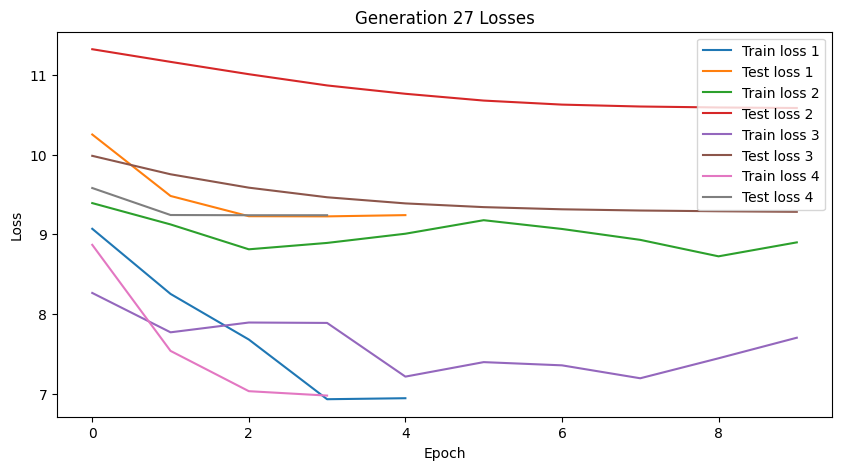

Generation 27, Best Fitness: -11.7069

Generation 28
[[1, 128, 16, 64, 128, 8, 1], [1, 128, 64, 128, 2, 64, 4, 1], [1, 8, 1], [1, 64, 16, 16, 1]]


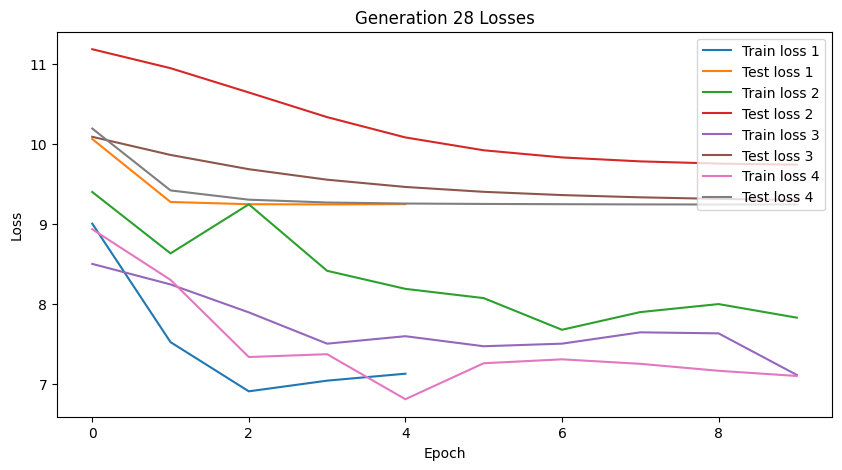

Generation 28, Best Fitness: -10.9227

Generation 29
[[1, 128, 16, 64, 128, 8, 1], [1, 2, 64, 128, 16, 2, 4, 1], [1, 8, 1], [1, 16, 16, 1]]


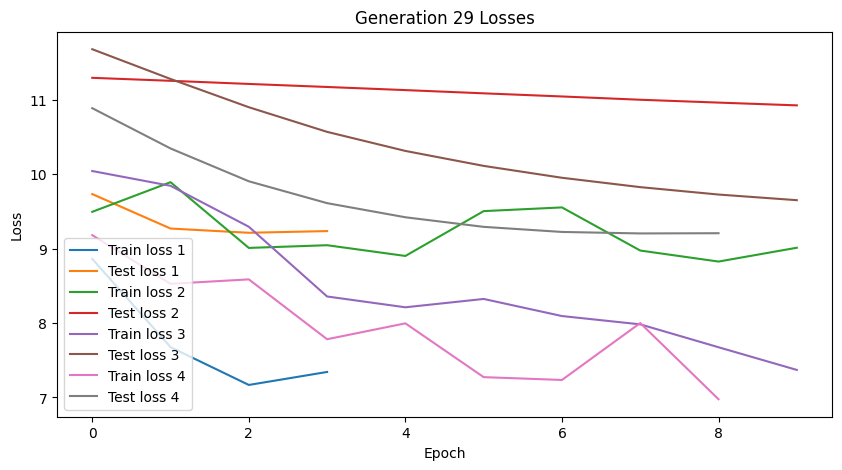

Generation 29, Best Fitness: -11.9407

Generation 30
[[1, 2, 64, 128, 128, 8, 1], [1, 128, 16, 64, 4, 2, 4, 1], [1, 8, 16, 1], [1, 16, 1]]


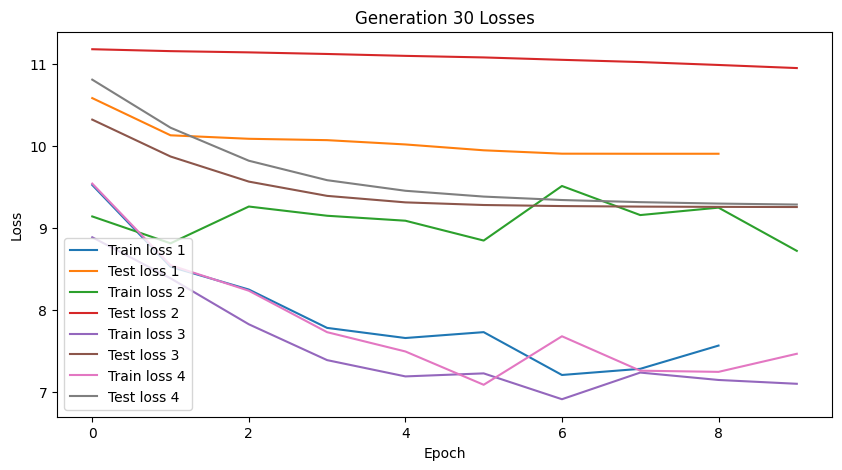

Generation 30, Best Fitness: -11.9609

Generation 31
[[1, 128, 16, 32, 4, 8, 1], [1, 2, 64, 128, 128, 8, 4, 1], [1, 8, 1], [1, 16, 16, 1]]


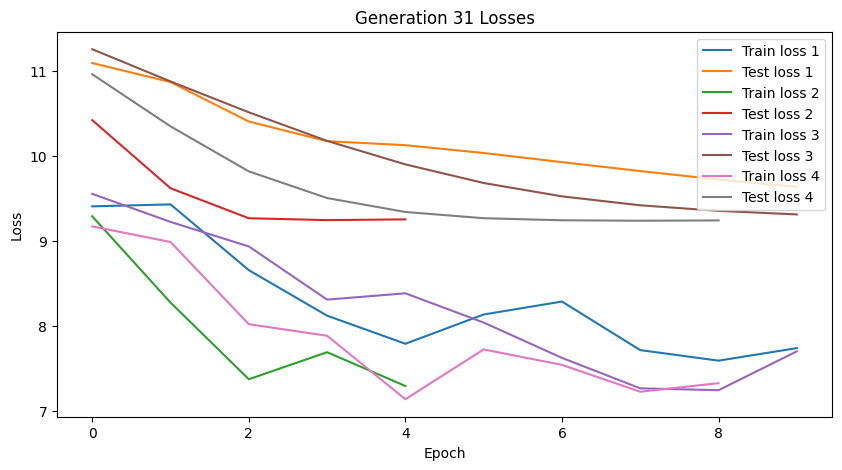

Generation 31, Best Fitness: -10.5475

Generation 32
[[1, 2, 64, 128, 128, 8, 4, 1], [1, 128, 16, 32, 4, 8, 1], [1, 16, 1], [1, 8, 1]]


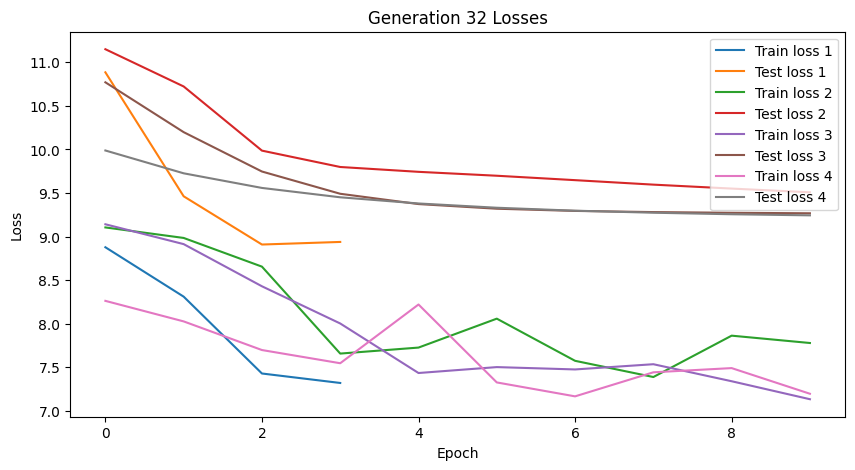

Generation 32, Best Fitness: -10.4199

Generation 33
[[1, 128, 16, 128, 128, 8, 4, 1], [1, 64, 32, 32, 8, 1], [1, 16, 1], [1, 8, 1]]


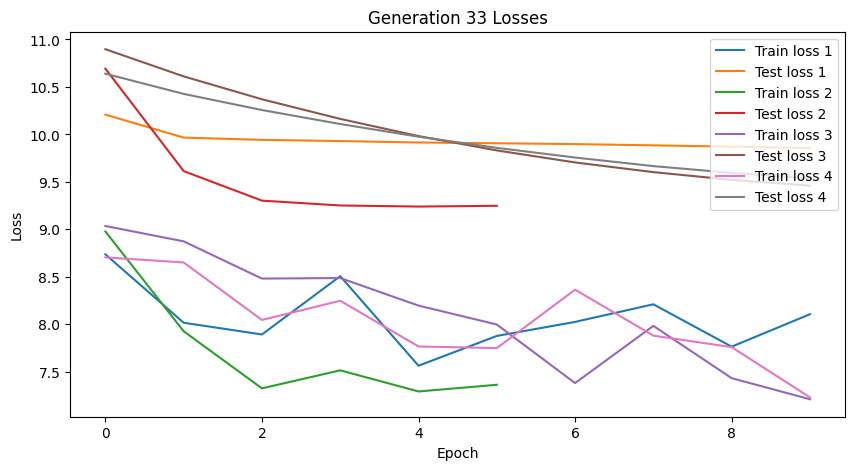

Generation 33, Best Fitness: -11.0604

Generation 34
[[1, 128, 16, 32, 8, 1], [1, 64, 128, 128, 128, 8, 4, 1], [1, 64, 1], [1, 8, 1]]


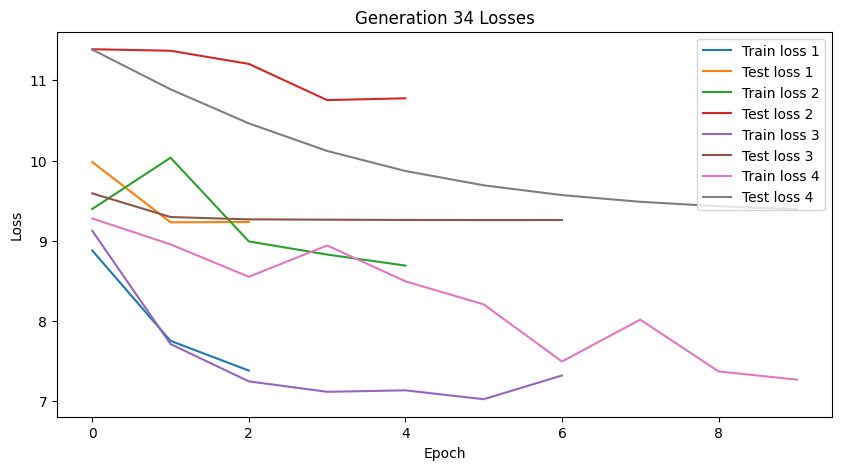

Generation 34, Best Fitness: -12.0279

Generation 35
[[1, 32, 128, 128, 8, 1], [1, 128, 128, 32, 128, 8, 64, 1], [1, 8, 1], [1, 128, 1]]


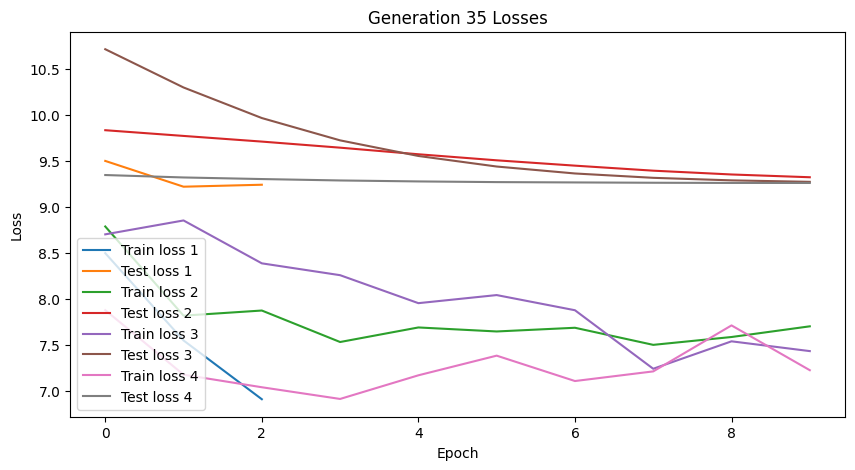

Generation 35, Best Fitness: -10.6004

Generation 36
[[1, 128, 128, 32, 1], [1, 32, 128, 128, 8, 8, 64, 1], [1, 128, 1], [1, 8, 1]]


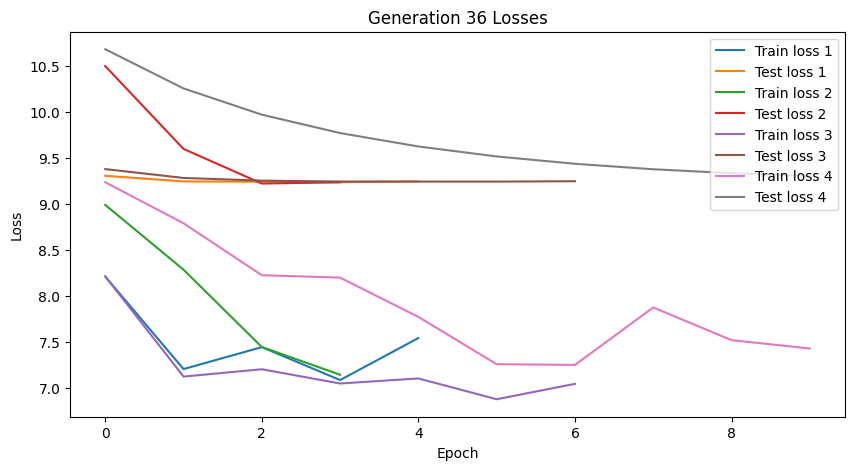

Generation 36, Best Fitness: -10.3998

Generation 37
[[1, 128, 128, 32, 1], [1, 4, 128, 128, 8, 8, 64, 1], [1, 128, 1], [1, 8, 1]]


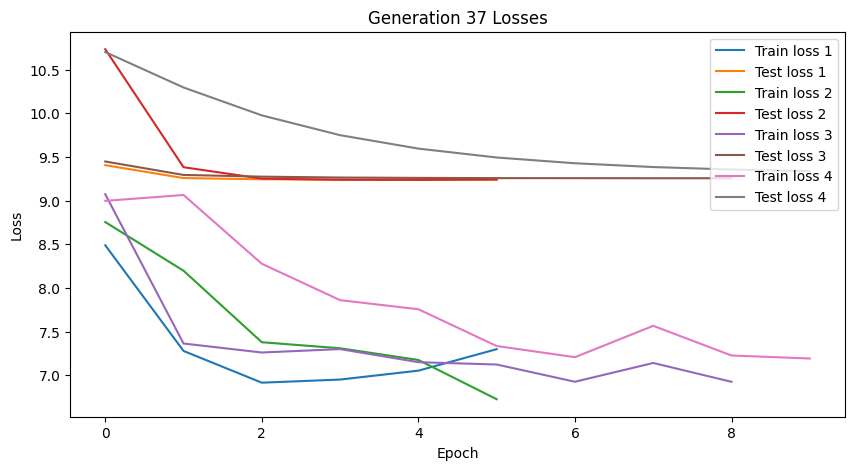

Generation 37, Best Fitness: -10.3768

Generation 38
[[1, 4, 16, 32, 1], [1, 128, 128, 32, 8, 8, 64, 1], [1, 128, 1], [1, 8, 1]]


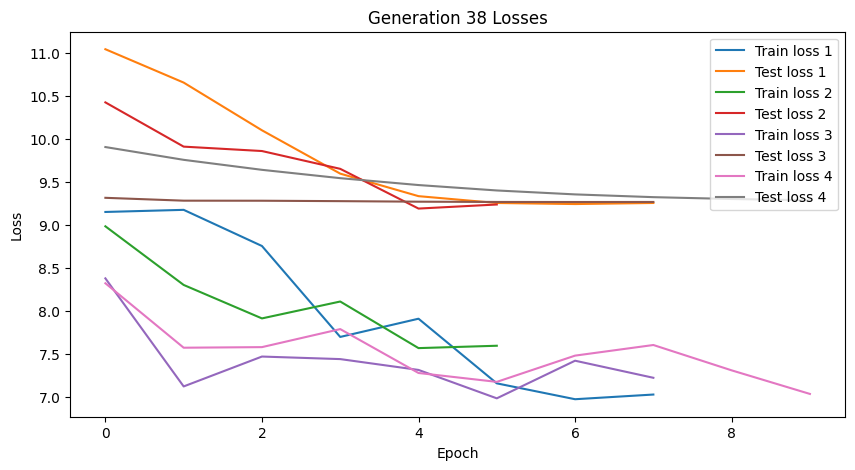

Generation 38, Best Fitness: -10.3995

Generation 39
[[1, 128, 1], [1, 128, 128, 32, 8, 32, 64, 1], [1, 8, 1], [1, 4, 16, 32, 1]]


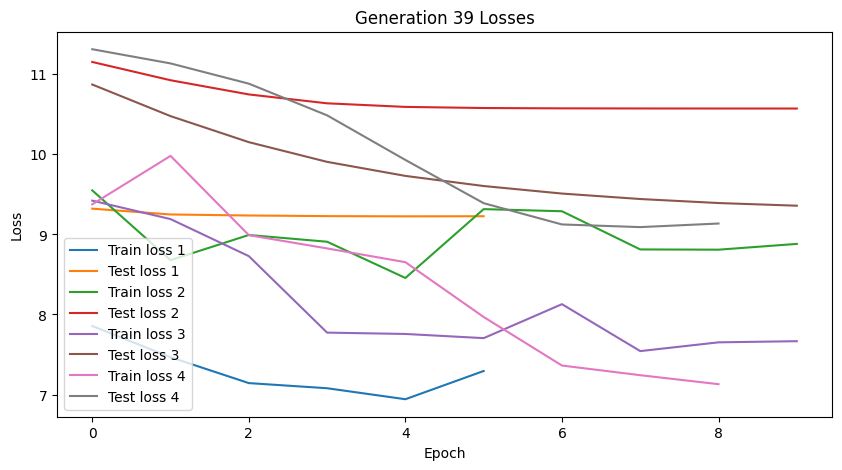

Generation 39, Best Fitness: -11.7569

Generation 40
[[1, 128, 1], [1, 128, 128, 16, 8, 32, 4, 1], [1, 4, 1], [1, 8, 16, 2, 1]]


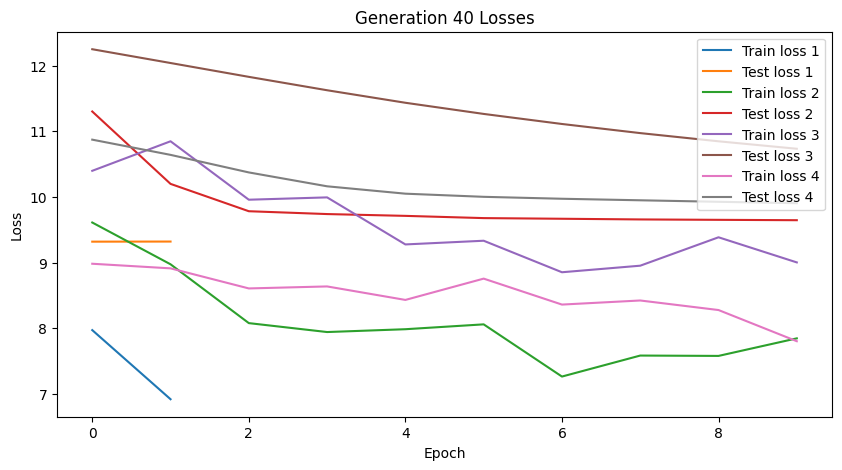

Generation 40, Best Fitness: -11.0492

Generation 41
[[1, 16, 128, 16, 128, 32, 32, 1], [1, 128, 1], [1, 128, 1], [1, 8, 16, 2, 1]]


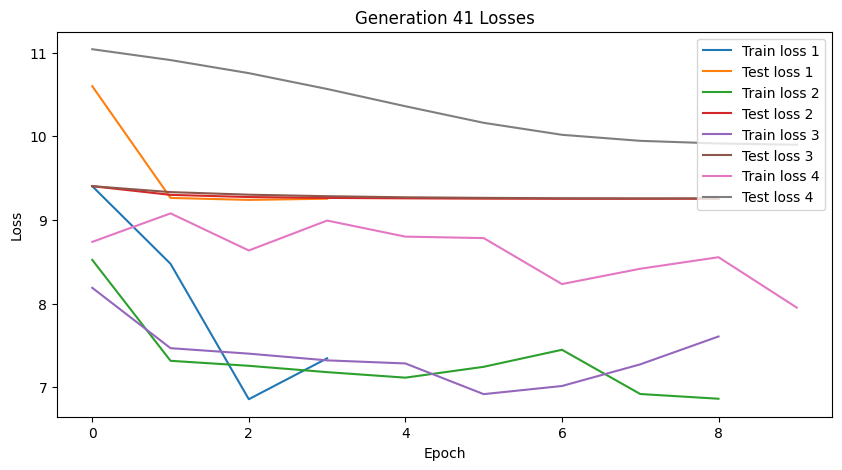

Generation 41, Best Fitness: -10.4429

Generation 42
[[1, 8, 16, 16, 128, 32, 32, 1], [1, 2, 128, 2, 1], [1, 128, 1], [1, 128, 1]]


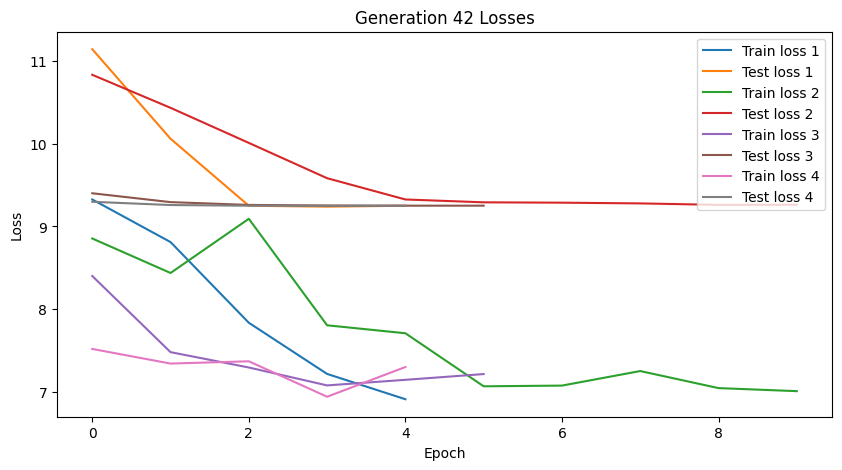

Generation 42, Best Fitness: -10.2792

Generation 43
[[1, 8, 16, 2, 1], [1, 2, 128, 16, 128, 32, 32, 1], [1, 128, 1], [1, 8, 1]]


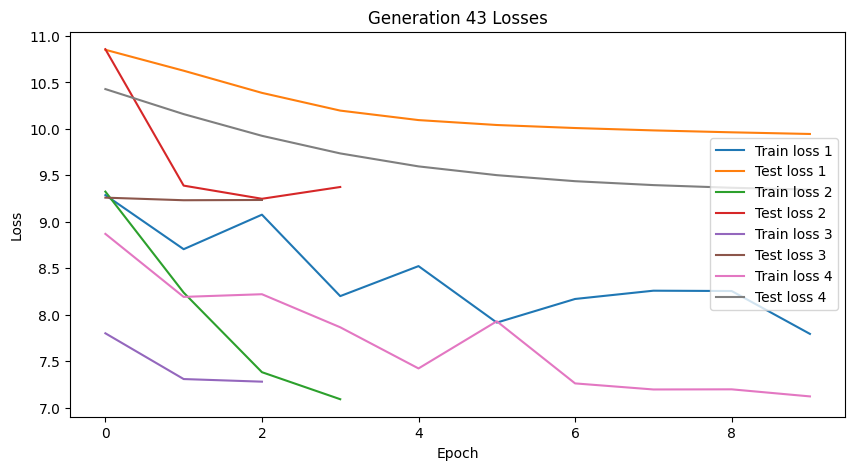

Generation 43, Best Fitness: -10.5061

Generation 44
[[1, 2, 16, 2, 1], [1, 8, 128, 16, 128, 32, 32, 1], [1, 8, 1], [1, 128, 1]]


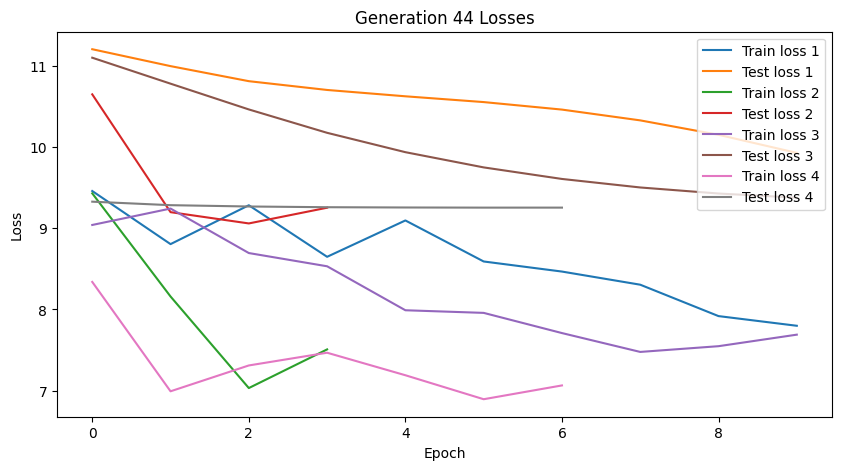

Generation 44, Best Fitness: -10.4615

Generation 45
[[1, 4, 16, 2, 128, 32, 32, 1], [1, 8, 128, 16, 1], [1, 8, 1], [1, 128, 1]]


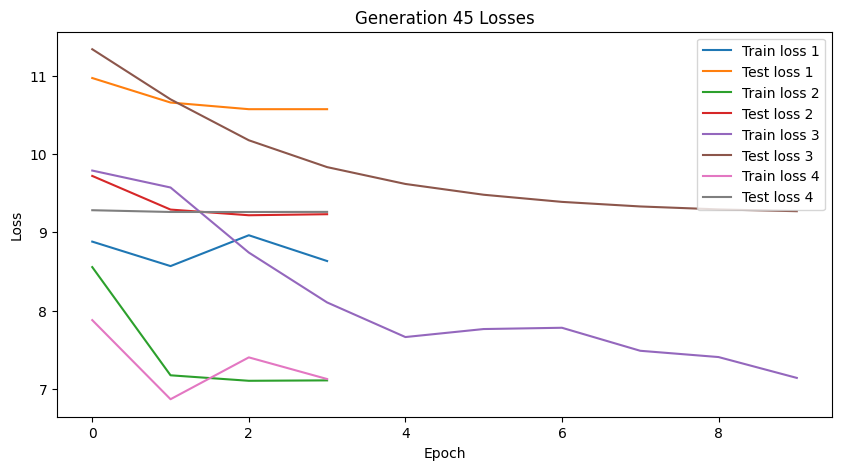

Generation 45, Best Fitness: -11.5817

Generation 46
[[1, 8, 128, 16, 1], [1, 4, 16, 2, 128, 32, 32, 1], [1, 8, 1], [1, 16, 1]]


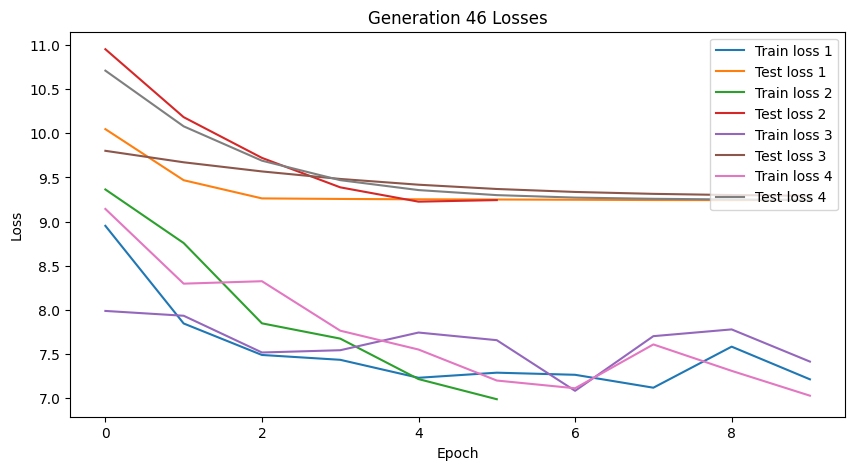

Generation 46, Best Fitness: -10.2539

Generation 47
[[1, 4, 16, 2, 1], [1, 8, 128, 16, 128, 32, 32, 1], [1, 8, 1], [1, 16, 1]]


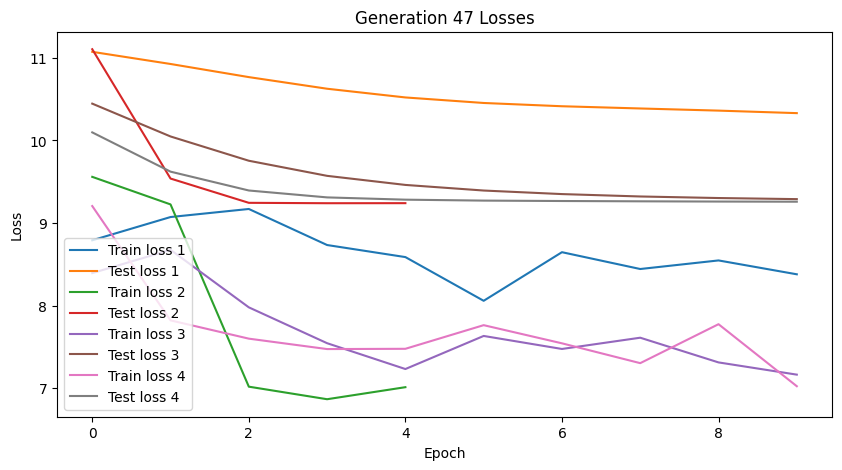

Generation 47, Best Fitness: -10.8677

Generation 48
[[1, 4, 16, 2, 128, 32, 32, 1], [1, 8, 16, 16, 1], [1, 16, 1], [1, 8, 1]]


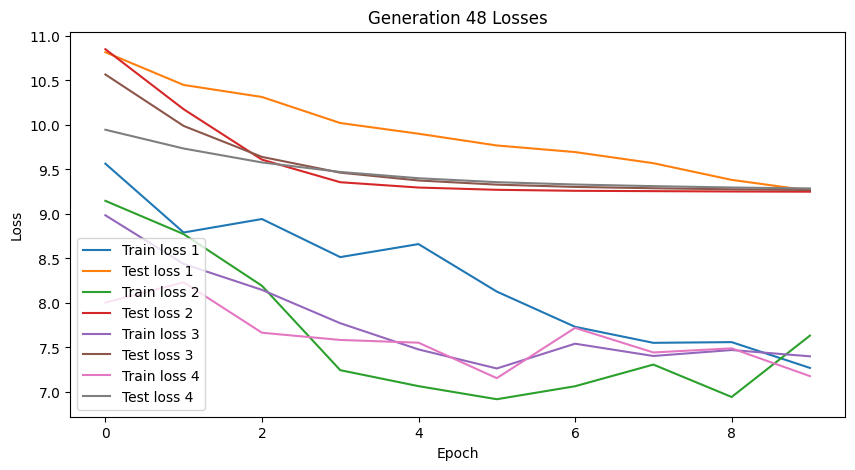

Generation 48, Best Fitness: -10.2736

Generation 49
[[1, 4, 16, 2, 1], [1, 8, 16, 16, 128, 32, 32, 1], [1, 16, 1], [1, 8, 1]]


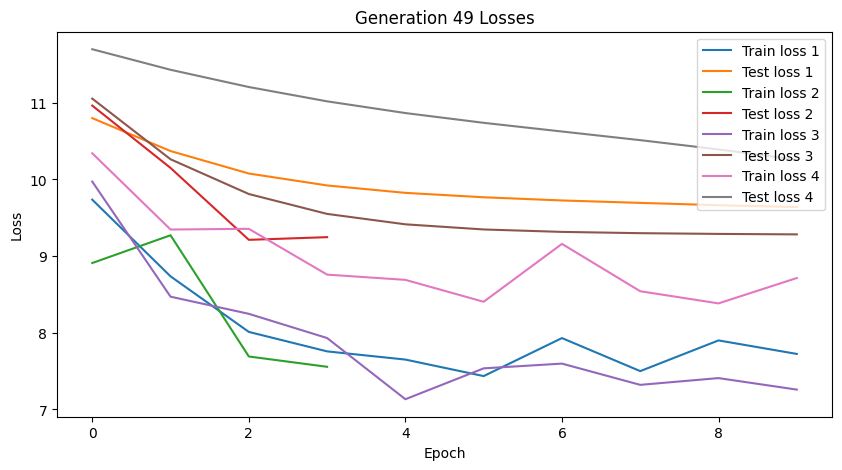

Generation 49, Best Fitness: -10.5824

Generation 50
[[1, 64, 16, 16, 128, 32, 32, 1], [1, 8, 1], [1, 16, 1], [1, 4, 16, 2, 1]]


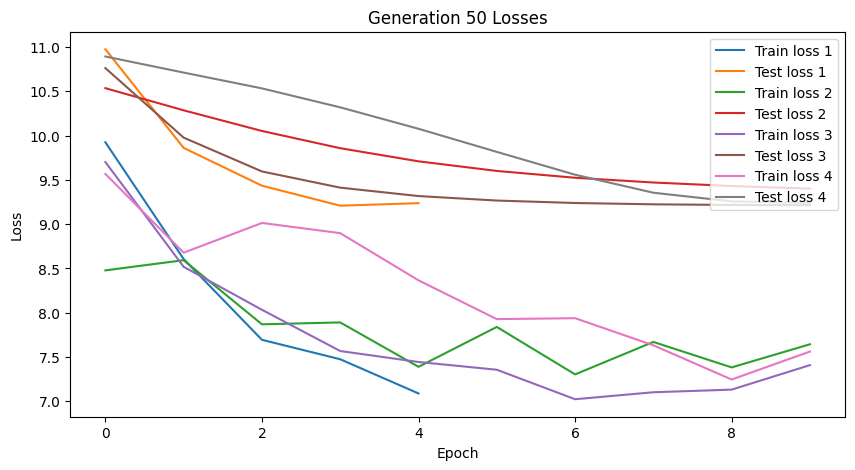

Generation 50, Best Fitness: -10.3206

Generation 51
[[1, 2, 16, 2, 1], [1, 4, 16, 16, 128, 32, 32, 1], [1, 8, 1], [1, 16, 1]]


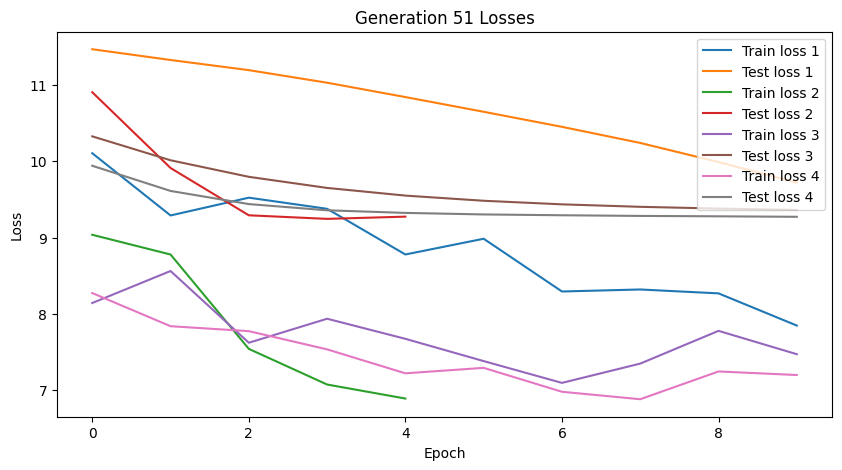

Generation 51, Best Fitness: -10.2981

Generation 52
[[1, 4, 16, 2, 1], [1, 2, 16, 16, 128, 32, 32, 1], [1, 8, 1], [1, 16, 1]]


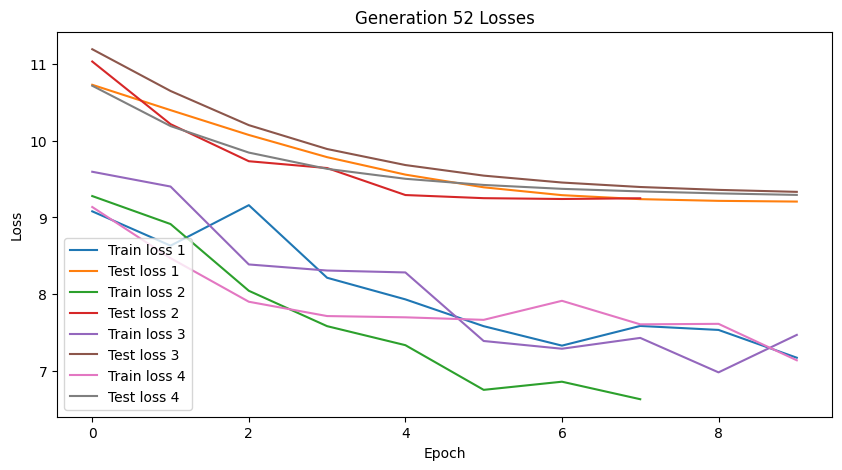

Generation 52, Best Fitness: -10.2728

Generation 53
[[1, 2, 16, 16, 1], [1, 8, 32, 2, 128, 32, 1], [1, 16, 1], [1, 8, 1]]


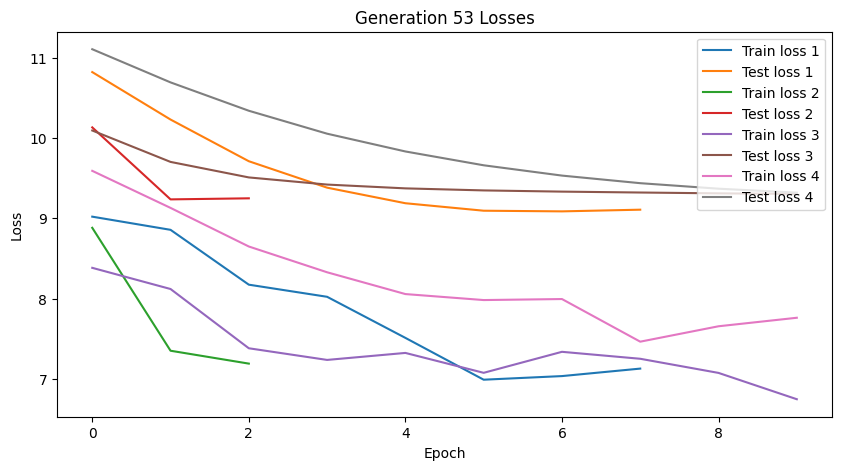

Generation 53, Best Fitness: -10.1763

Generation 54
[[1, 8, 32, 16, 1], [1, 2, 16, 2, 128, 32, 1], [1, 16, 1], [1, 8, 1]]


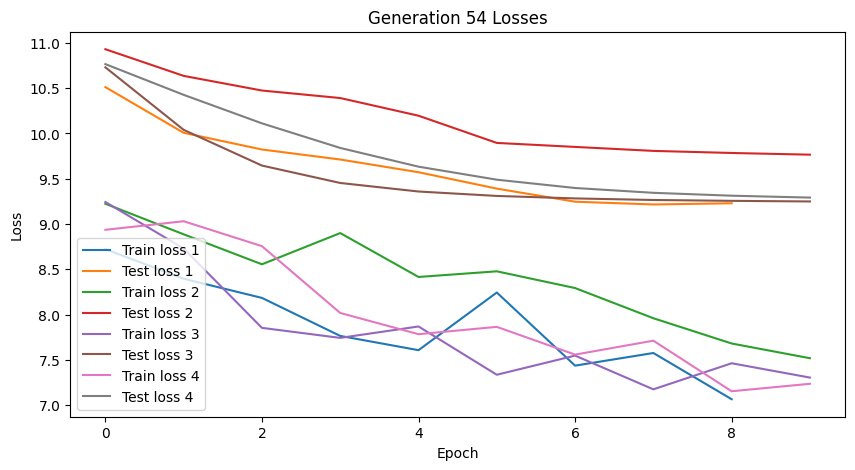

Generation 54, Best Fitness: -10.6691

Generation 55
[[1, 2, 16, 2, 1], [1, 8, 8, 16, 128, 4, 1], [1, 16, 1], [1, 8, 1]]


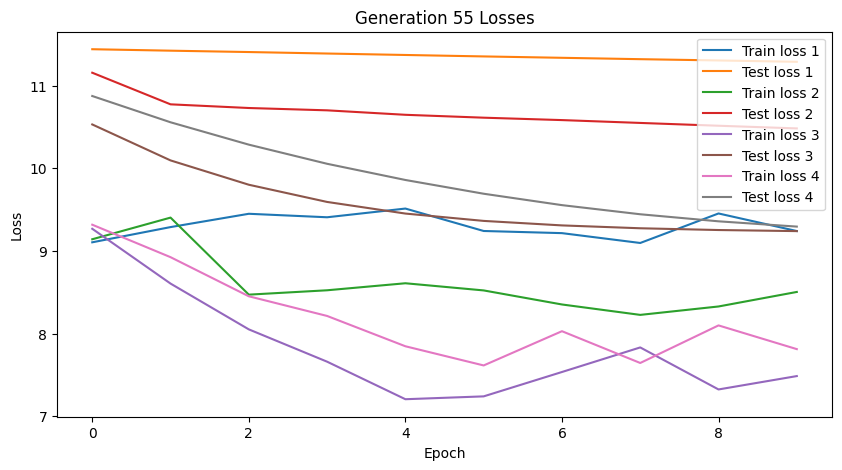

Generation 55, Best Fitness: -11.8244

Generation 56
[[1, 2, 16, 2, 128, 4, 1], [1, 64, 8, 16, 1], [1, 16, 1], [1, 8, 1]]


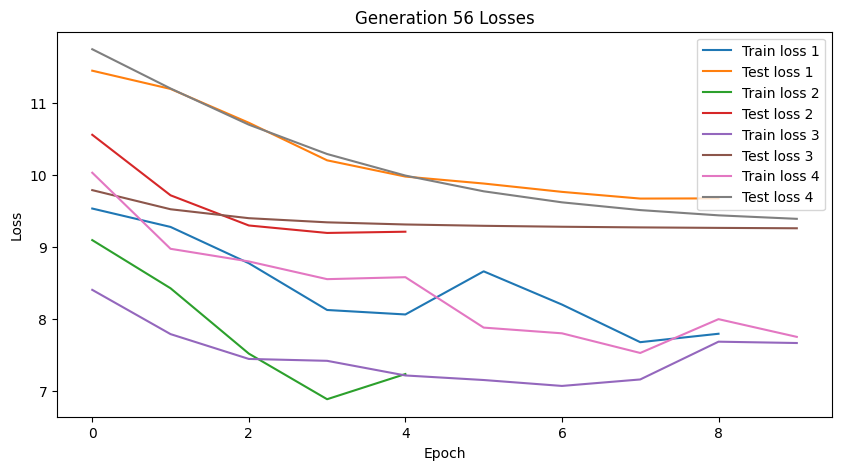

Generation 56, Best Fitness: -10.5458

Generation 57
[[1, 2, 16, 2, 1], [1, 64, 8, 16, 8, 4, 1], [1, 8, 1], [1, 16, 1]]


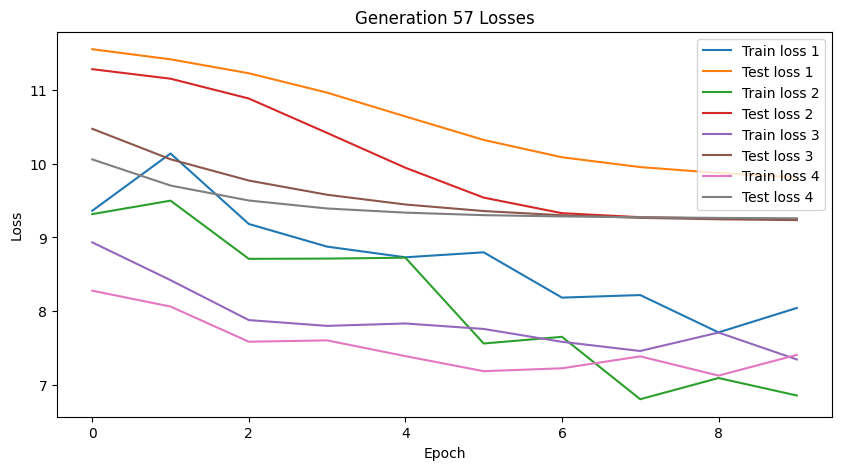

Generation 57, Best Fitness: -10.3467

Generation 58
[[1, 2, 16, 2, 8, 4, 1], [1, 8, 16, 1], [1, 8, 1], [1, 16, 1]]


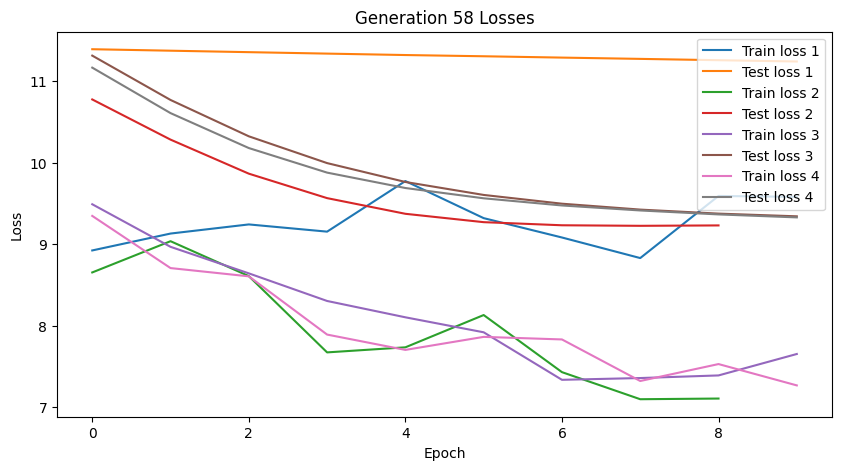

Generation 58, Best Fitness: -11.9819

Generation 59
[[1, 2, 16, 1], [1, 8, 16, 2, 2, 4, 1], [1, 8, 1], [1, 16, 1]]


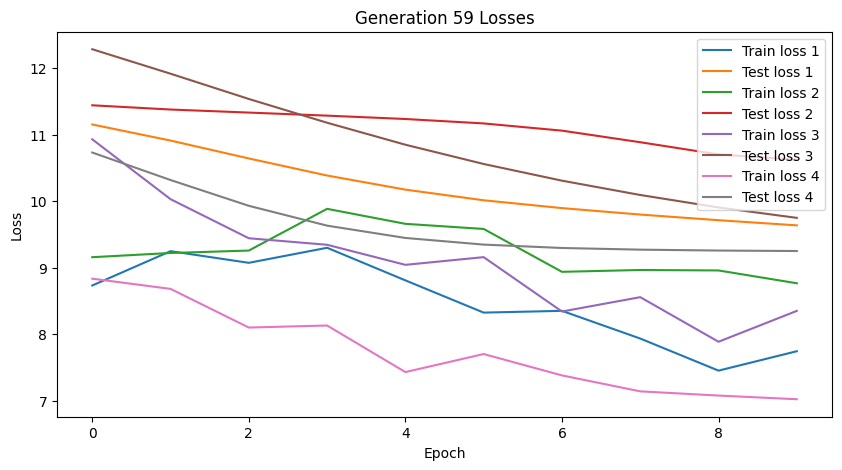

Generation 59, Best Fitness: -11.3608

Generation 60
[[1, 2, 128, 1], [1, 8, 16, 2, 2, 4, 1], [1, 2, 1], [1, 128, 1]]


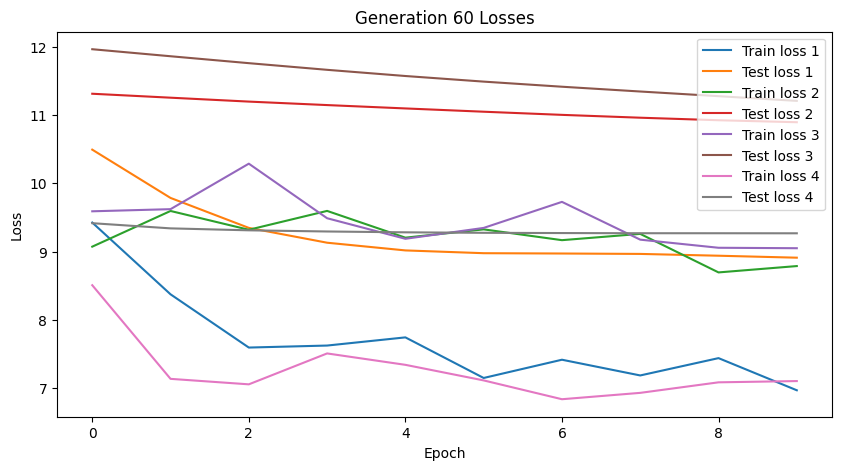

Generation 60, Best Fitness: -11.6353

Generation 61
[[1, 2, 1], [1, 8, 16, 2, 2, 4, 1], [1, 128, 128, 1], [1, 2, 1]]


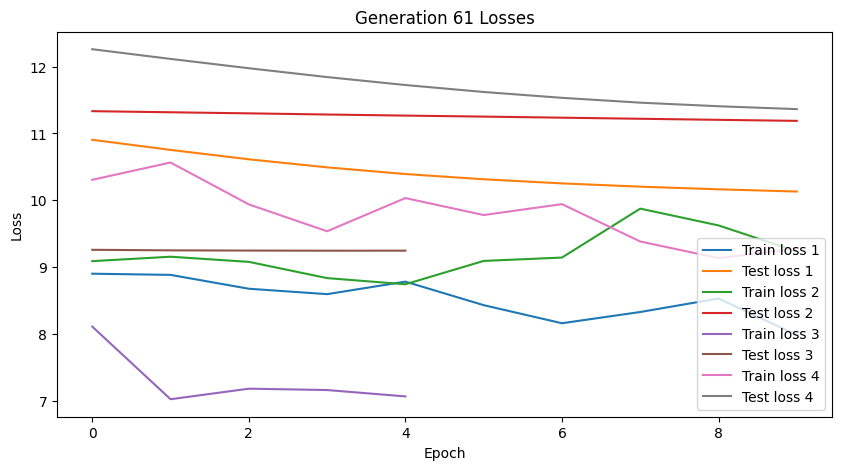

Generation 61, Best Fitness: -11.9263

Generation 62
[[1, 8, 1], [1, 2, 16, 2, 2, 4, 1], [1, 2, 4, 1], [1, 128, 1]]


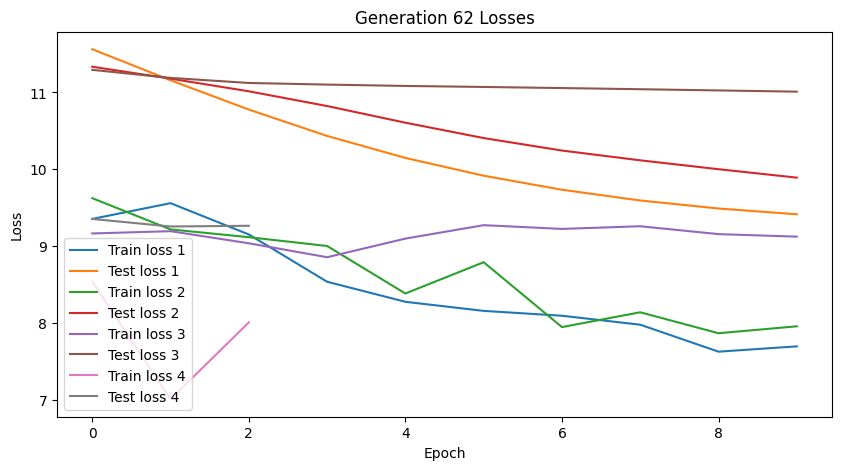

Generation 62, Best Fitness: -11.4264

Generation 63
[[1, 2, 16, 2, 128, 4, 1], [1, 2, 16, 1], [1, 8, 1], [1, 128, 1]]


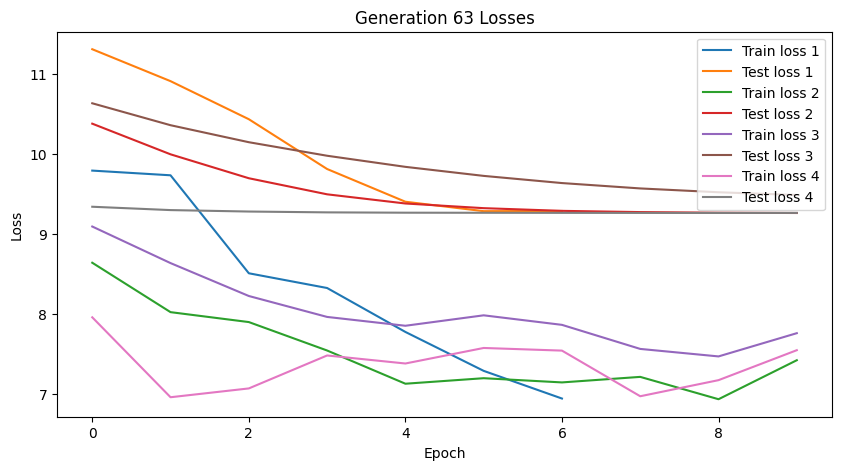

Generation 63, Best Fitness: -10.1578

Generation 64
[[1, 64, 1], [1, 2, 16, 2, 128, 4, 1], [1, 16, 1], [1, 8, 1]]


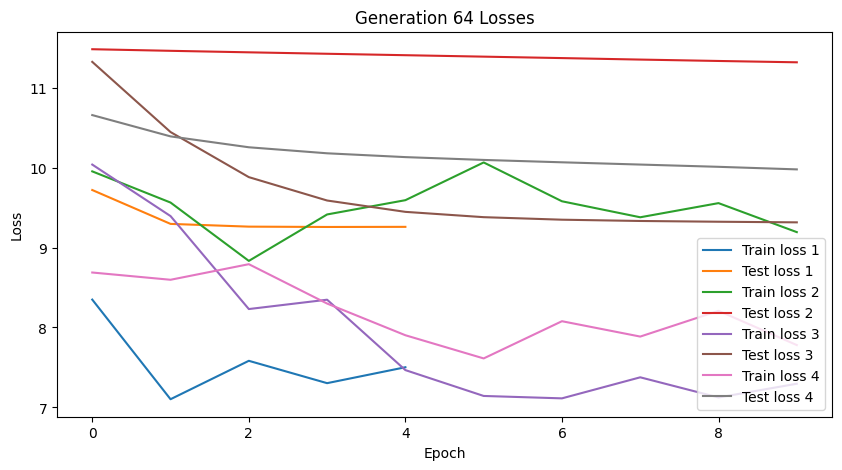

Generation 64, Best Fitness: -12.1901

Generation 65
[[1, 2, 1], [1, 8, 16, 2, 16, 32, 1], [1, 64, 1], [1, 16, 1]]


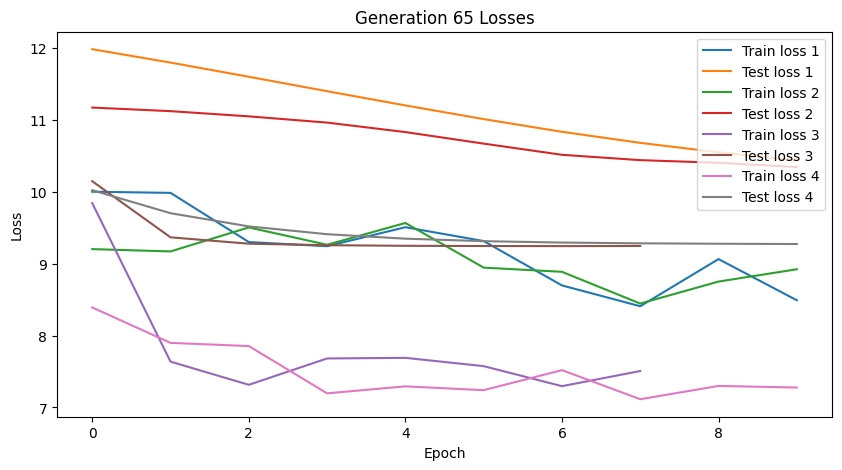

Generation 65, Best Fitness: -11.1281

Generation 66
[[1, 8, 1], [1, 2, 16, 32, 16, 32, 1], [1, 128, 1], [1, 64, 1]]


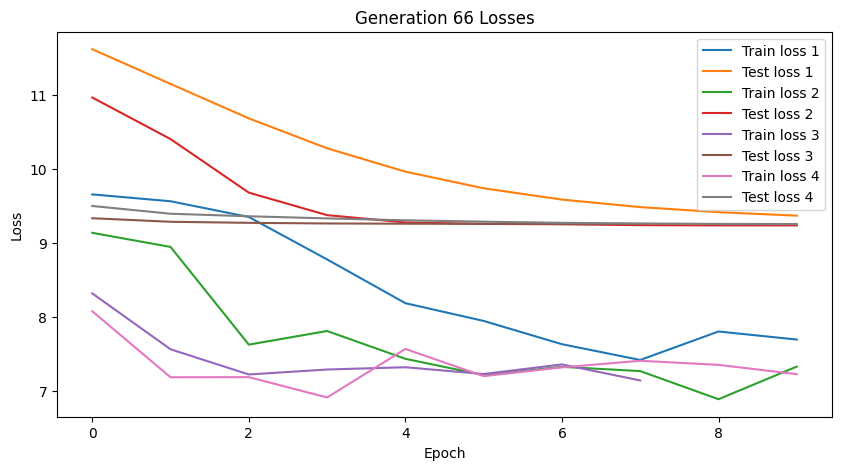

Generation 66, Best Fitness: -10.0500

Generation 67
[[1, 2, 1], [1, 128, 16, 32, 64, 32, 1], [1, 128, 1], [1, 8, 1]]


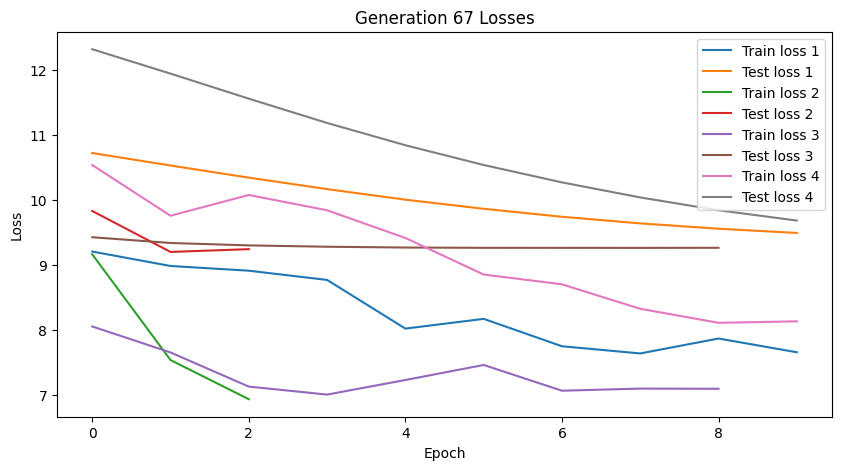

Generation 67, Best Fitness: -10.2438

Generation 68
[[1, 8, 1], [1, 128, 16, 32, 64, 32, 1], [1, 128, 1], [1, 2, 1]]


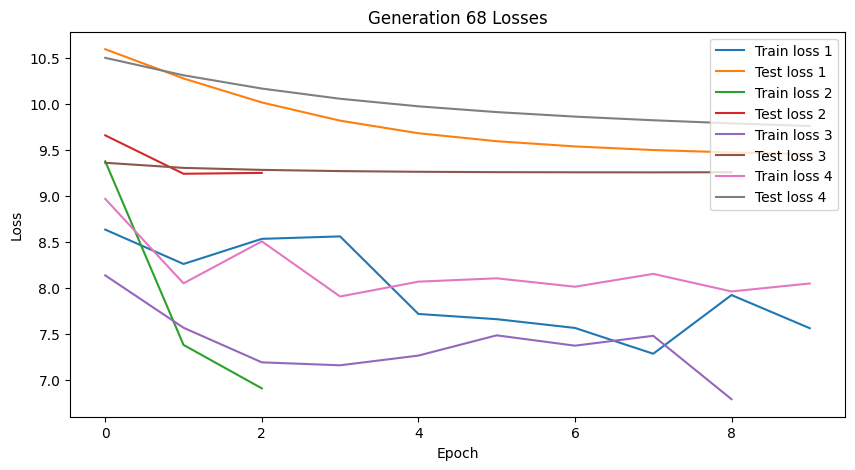

Generation 68, Best Fitness: -10.2583

Generation 69
[[1, 32, 1], [1, 2, 16, 32, 8, 1], [1, 128, 1], [1, 8, 1]]


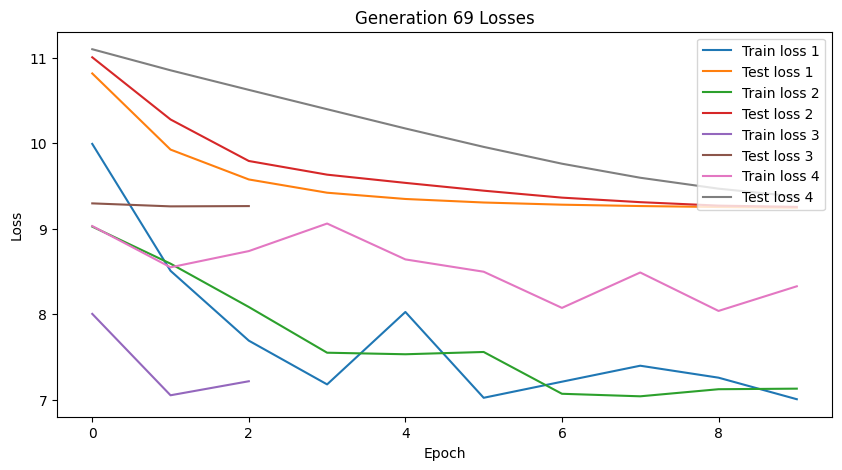

Generation 69, Best Fitness: -9.9346

Generation 70
[[1, 2, 1], [1, 128, 16, 64, 8, 1], [1, 8, 1], [1, 32, 1]]


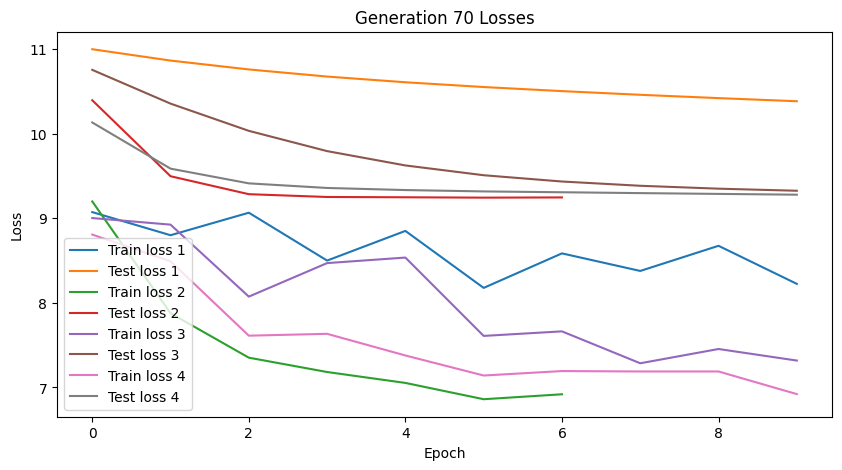

Generation 70, Best Fitness: -10.6937

Generation 71
[[1, 2, 16, 64, 8, 1], [1, 128, 1], [1, 32, 1], [1, 8, 1]]


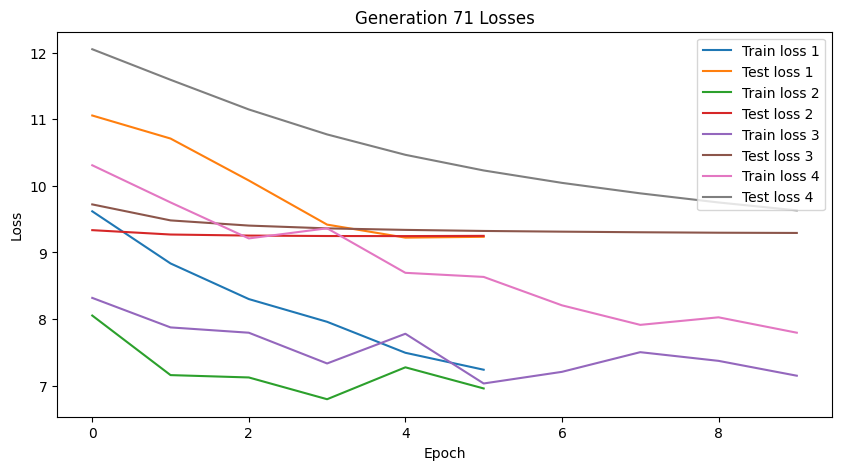

Generation 71, Best Fitness: -9.9576

Generation 72
[[1, 8, 16, 64, 8, 1], [1, 2, 1], [1, 32, 1], [1, 16, 1]]


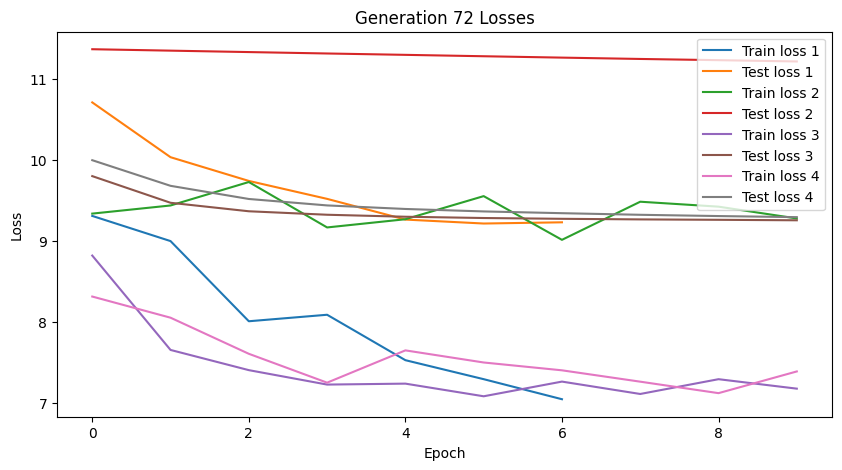

Generation 72, Best Fitness: -11.5297

Generation 73
[[1, 2, 2, 64, 8, 1], [1, 8, 1], [1, 16, 1], [1, 32, 1]]


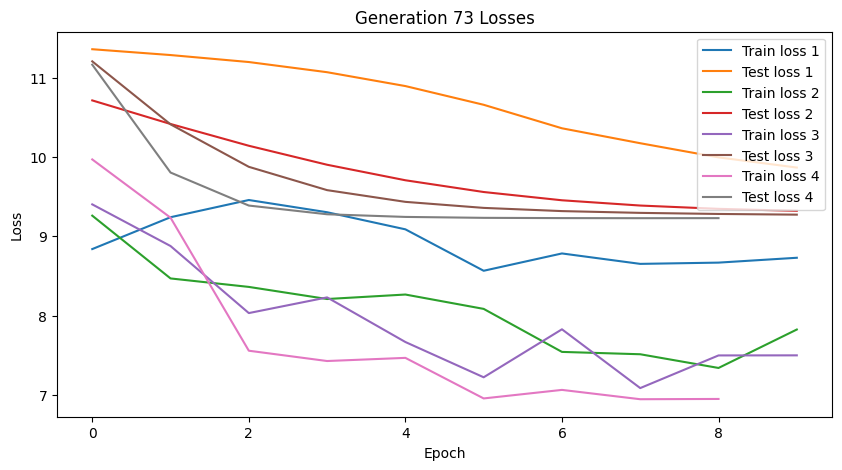

Generation 73, Best Fitness: -10.5673

Generation 74
[[1, 2, 1], [1, 4, 2, 64, 8, 1], [1, 16, 1], [1, 16, 1]]


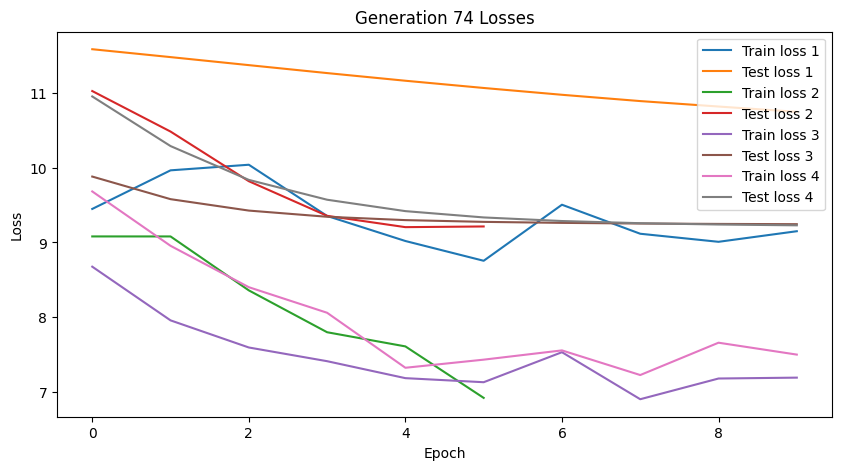

Generation 74, Best Fitness: -11.0554

Generation 75
[[1, 4, 8, 64, 8, 1], [1, 2, 1], [1, 16, 1], [1, 16, 1]]


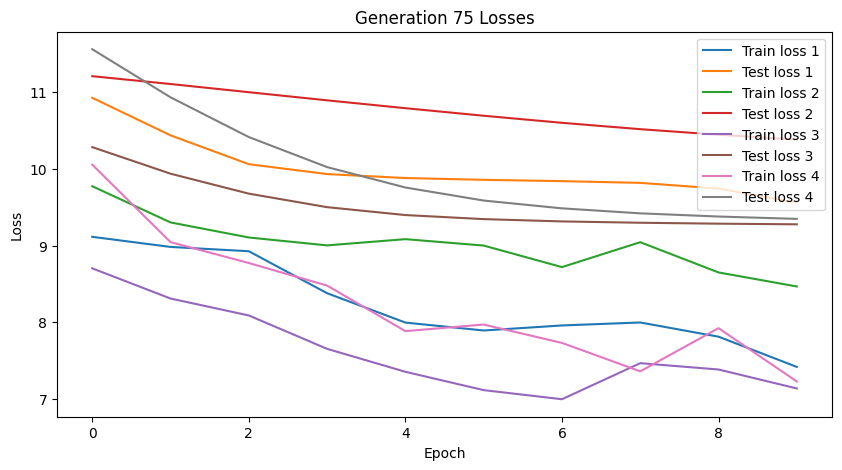

Generation 75, Best Fitness: -10.6921

Generation 76
[[1, 2, 8, 64, 8, 1], [1, 4, 1], [1, 16, 1], [1, 16, 1]]


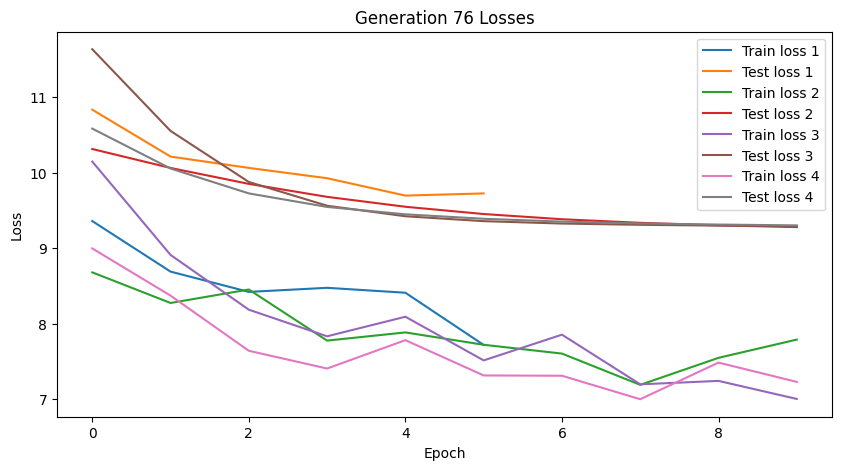

Generation 76, Best Fitness: -10.4326

Generation 77
[[1, 16, 1], [1, 2, 64, 8, 1], [1, 16, 1], [1, 4, 1]]


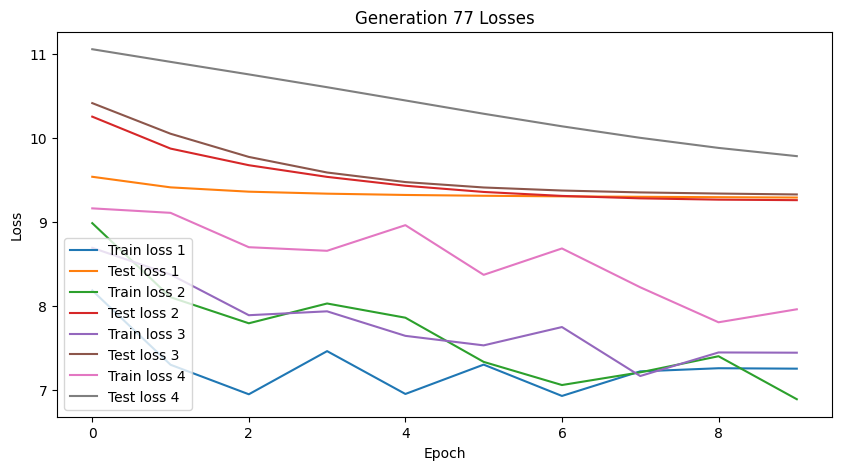

Generation 77, Best Fitness: -10.0939

Generation 78
[[1, 4, 64, 8, 1], [1, 2, 1], [1, 16, 1], [1, 16, 1]]


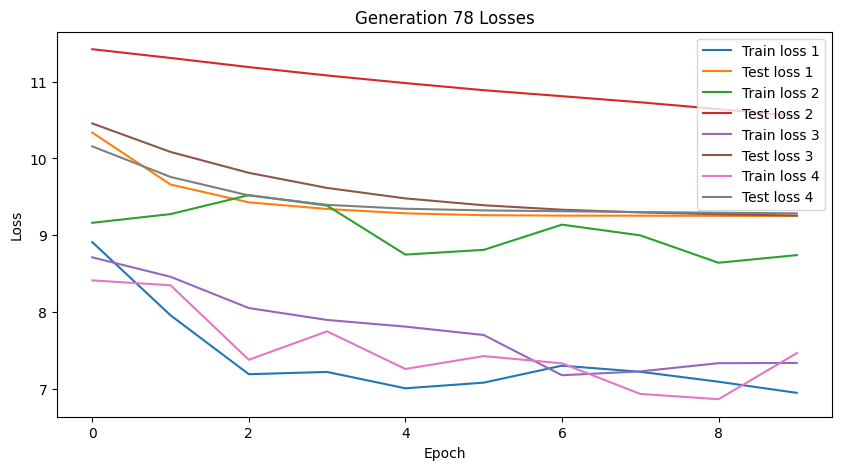

Generation 78, Best Fitness: -10.8590

Generation 79
[[1, 32, 8, 8, 1], [1, 4, 1], [1, 16, 1], [1, 16, 1]]


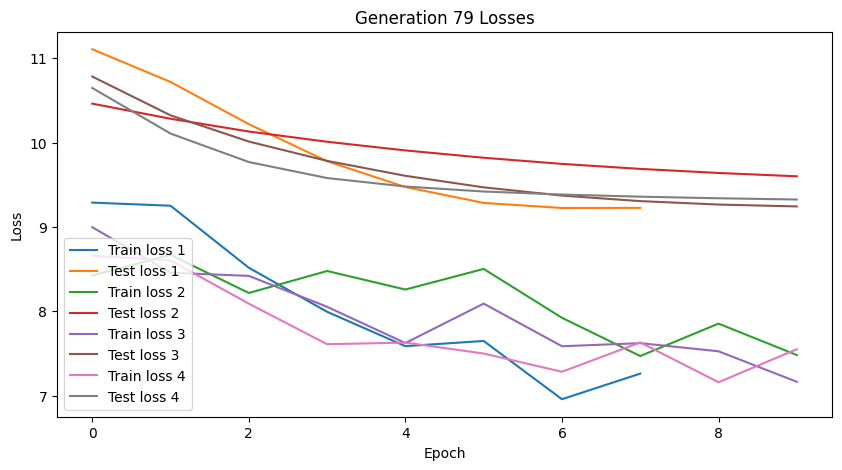

Generation 79, Best Fitness: -9.9164

Generation 80
[[1, 32, 8, 8, 1], [1, 4, 1], [1, 16, 1], [1, 16, 1]]


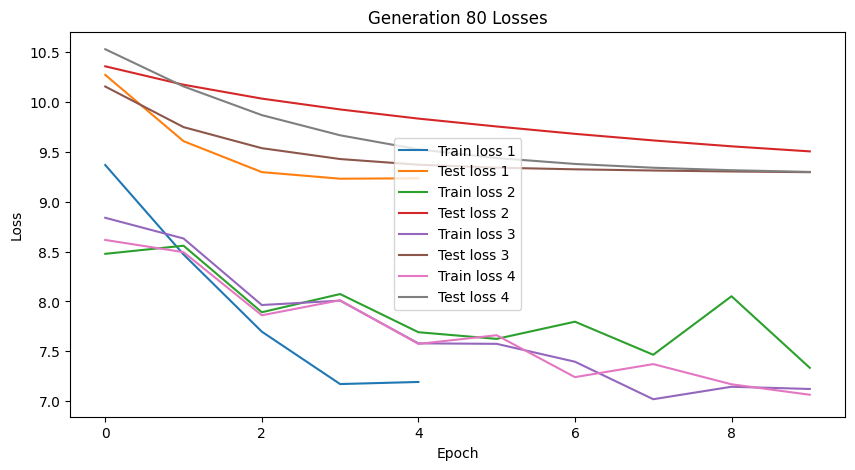

Generation 80, Best Fitness: -9.8204

Generation 81
[[1, 32, 8, 4, 1], [1, 4, 1], [1, 2, 1], [1, 16, 1]]


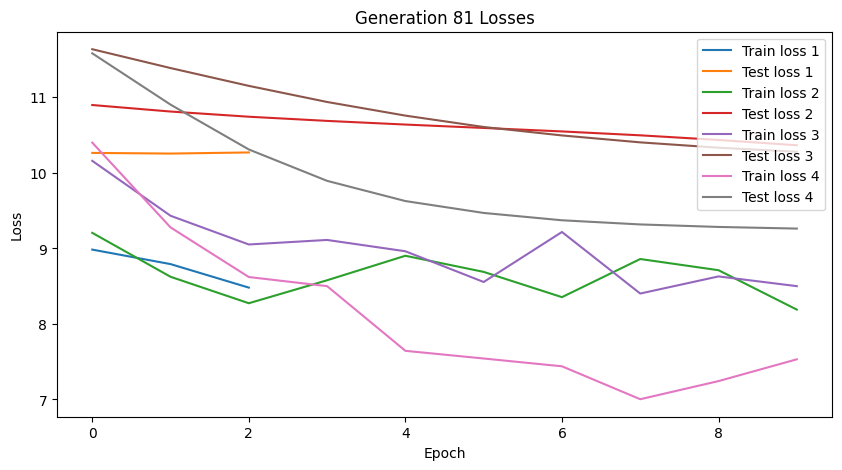

Generation 81, Best Fitness: -10.8422

Generation 82
[[1, 4, 1], [1, 32, 2, 8, 1], [1, 2, 1], [1, 16, 1]]


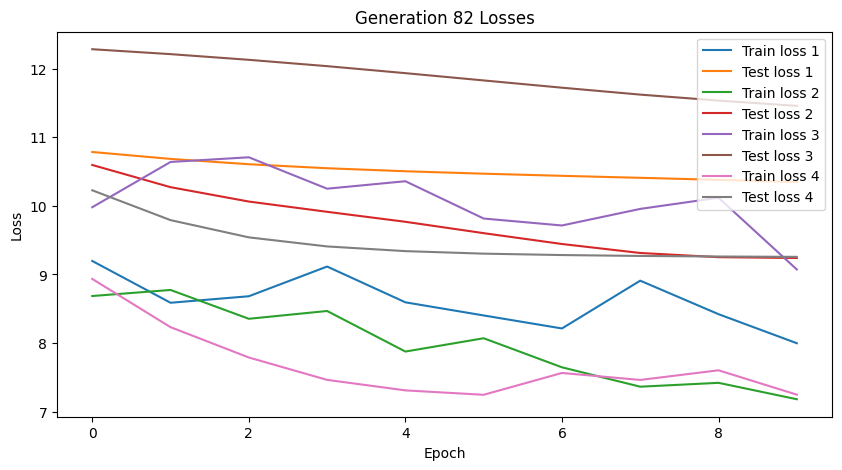

Generation 82, Best Fitness: -11.7674

Generation 83
[[1, 8, 1], [1, 4, 1], [1, 16, 1], [1, 32, 2, 8, 1]]


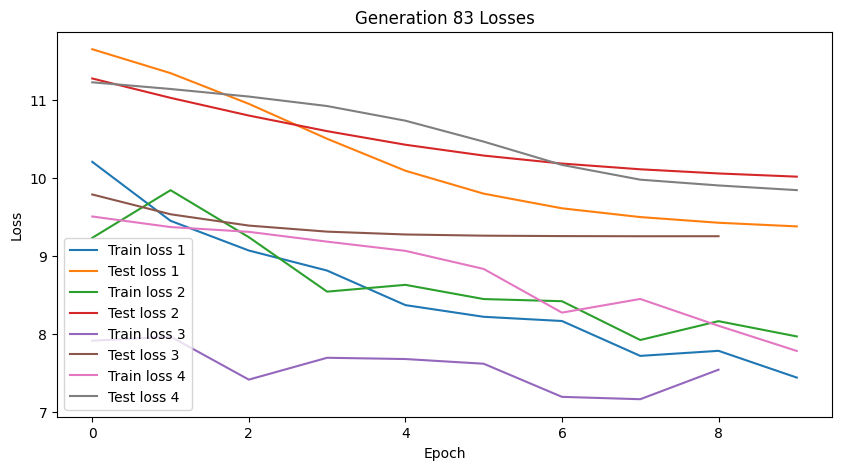

Generation 83, Best Fitness: -10.4133

Generation 84
[[1, 4, 1], [1, 32, 64, 8, 1], [1, 16, 1], [1, 8, 1]]


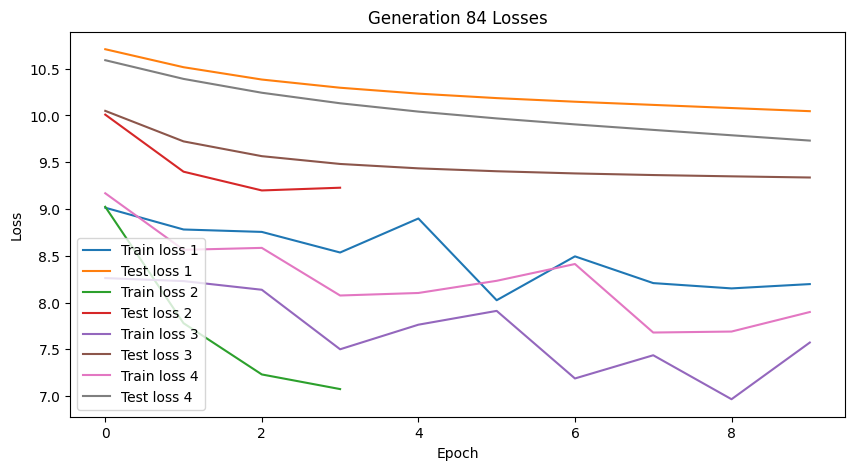

Generation 84, Best Fitness: -10.3614

Generation 85
[[1, 4, 1], [1, 8, 1], [1, 16, 1], [1, 32, 64, 8, 1]]


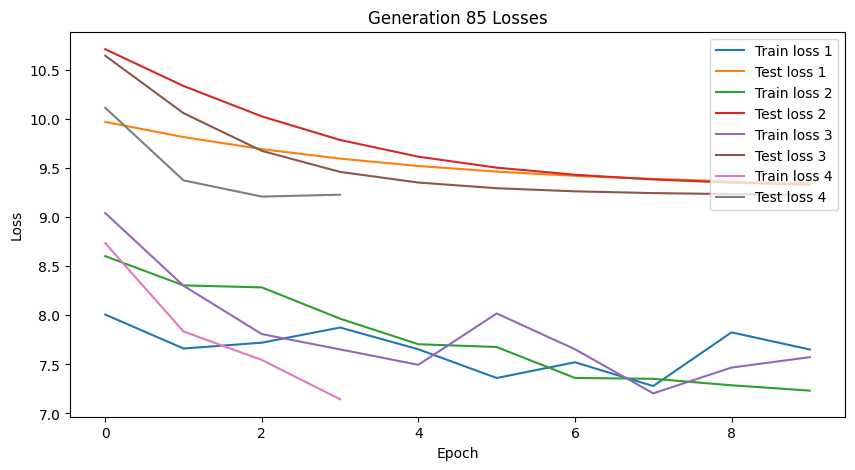

Generation 85, Best Fitness: -9.8944

Generation 86
[[1, 4, 1], [1, 32, 64, 8, 1], [1, 16, 1], [1, 8, 1]]


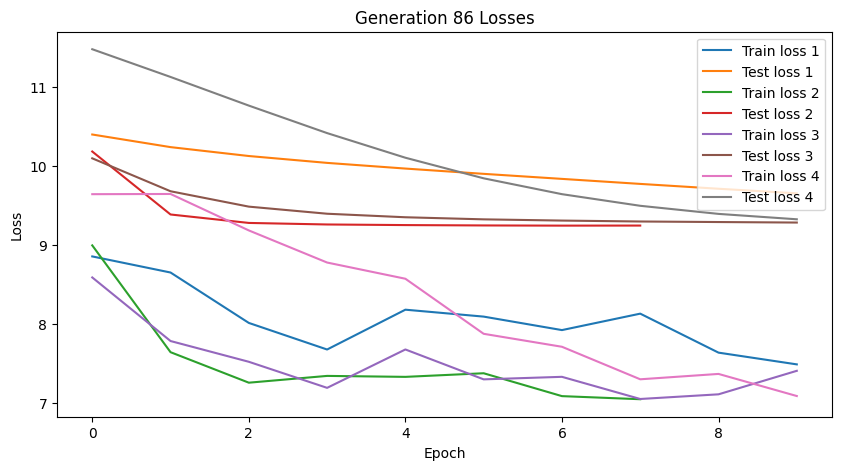

Generation 86, Best Fitness: -9.9695

Generation 87
[[1, 4, 64, 8, 1], [1, 128, 1], [1, 8, 1], [1, 16, 1]]


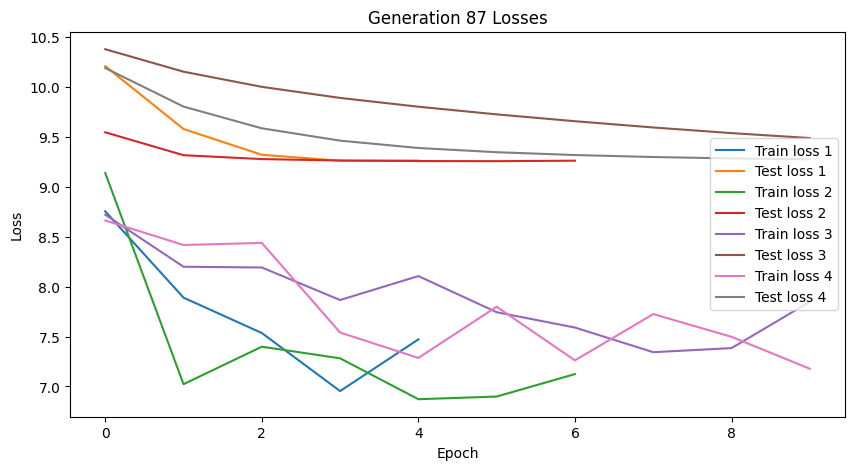

Generation 87, Best Fitness: -9.8973

Generation 88
[[1, 128, 64, 8, 1], [1, 4, 1], [1, 16, 1], [1, 8, 1]]


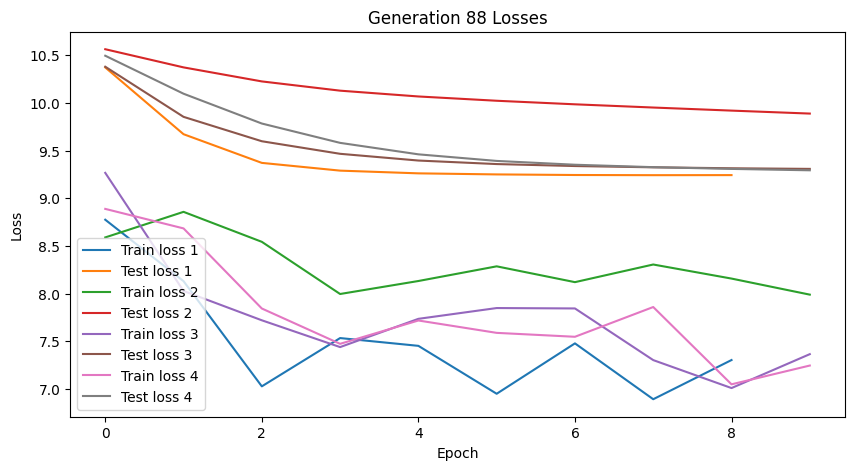

Generation 88, Best Fitness: -10.2035

Generation 89
[[1, 128, 64, 8, 1], [1, 4, 1], [1, 16, 1], [1, 8, 1]]


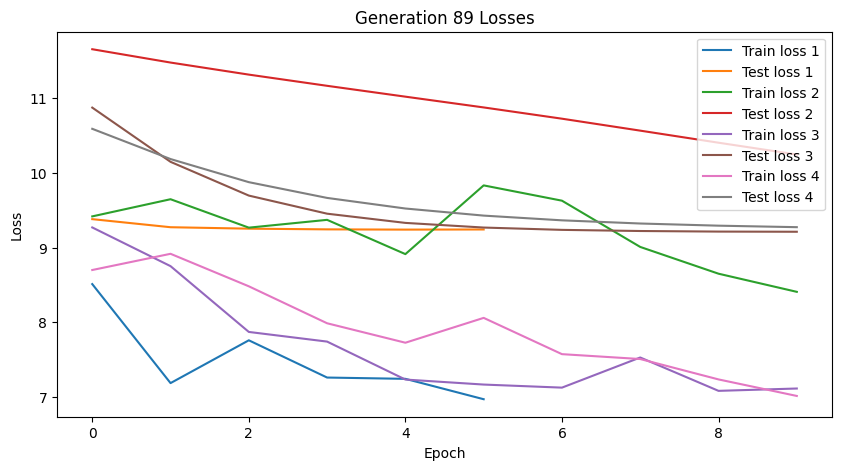

Generation 89, Best Fitness: -10.5632

Generation 90
[[1, 4, 64, 64, 1], [1, 128, 1], [1, 8, 1], [1, 16, 1]]


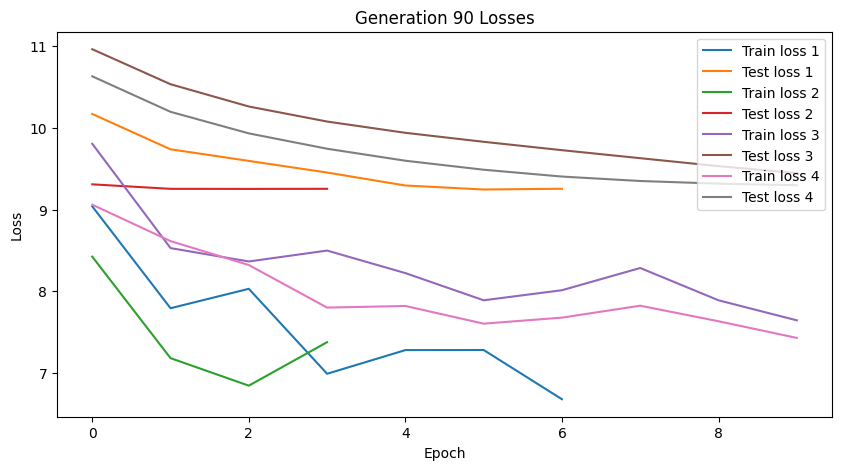

Generation 90, Best Fitness: -9.9645

Generation 91
[[1, 128, 1], [1, 64, 64, 1], [1, 8, 1], [1, 16, 1]]


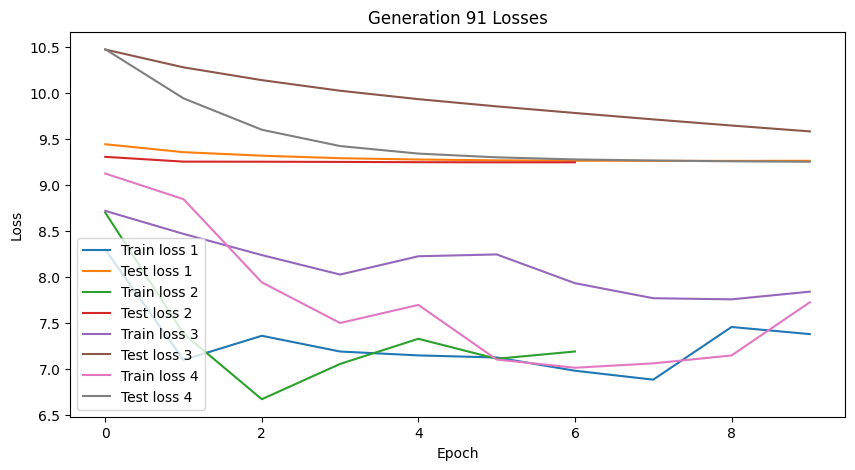

Generation 91, Best Fitness: -9.9071

Generation 92
[[1, 128, 1], [1, 8, 1], [1, 64, 1], [1, 16, 64, 1]]


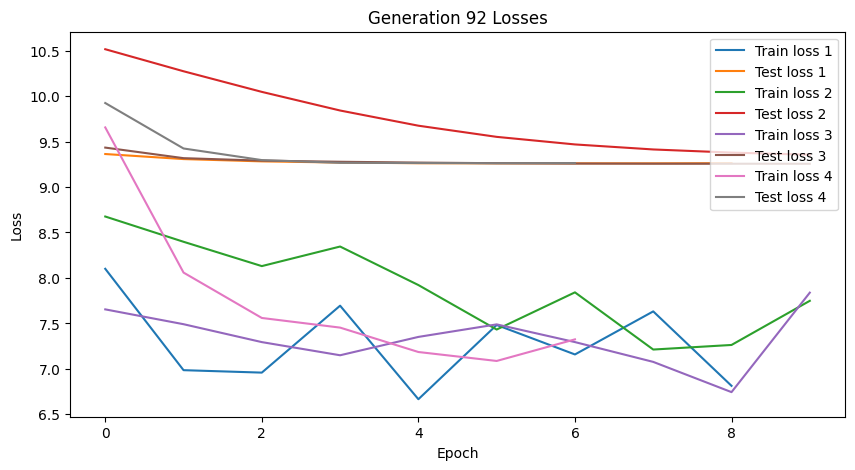

Generation 92, Best Fitness: -9.9009

Generation 93
[[1, 16, 64, 1], [1, 128, 1], [1, 8, 1], [1, 64, 1]]


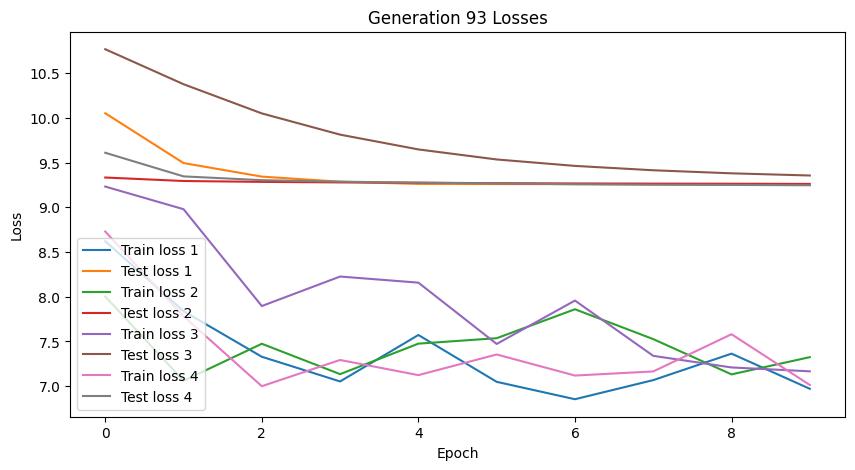

Generation 93, Best Fitness: -9.8997

Generation 94
[[1, 128, 4, 1], [1, 16, 1], [1, 64, 1], [1, 8, 1]]


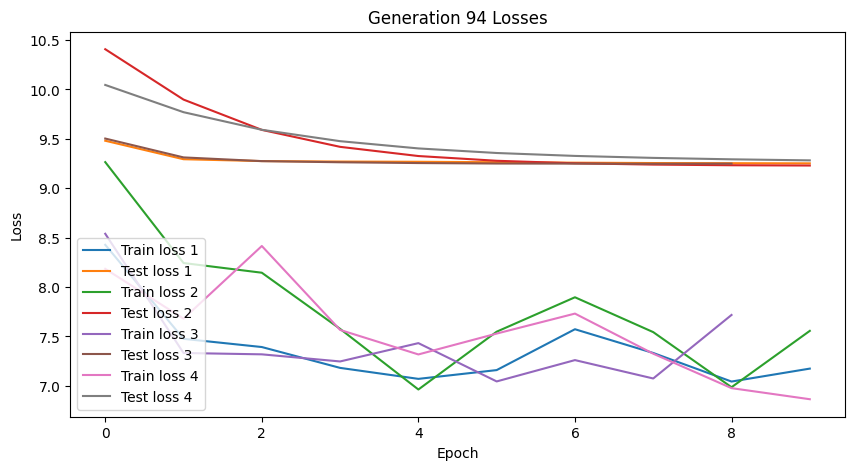

Generation 94, Best Fitness: -9.9140

Generation 95
[[1, 128, 1], [1, 4, 1], [1, 8, 1], [1, 16, 1]]


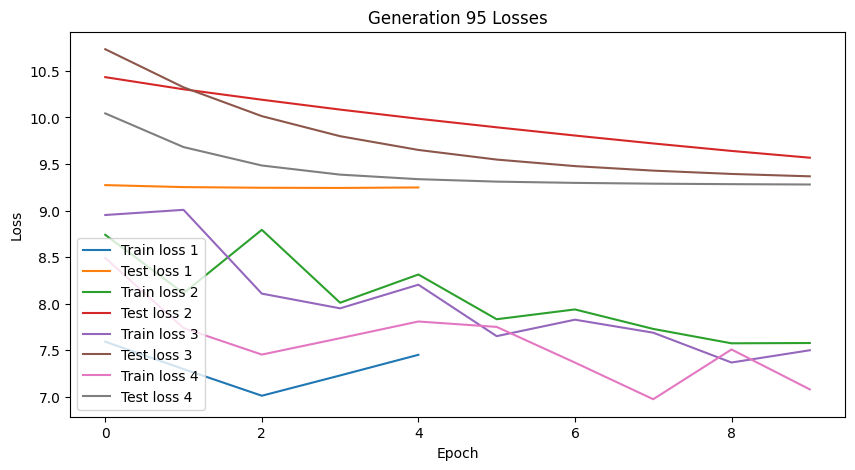

Generation 95, Best Fitness: -9.8866

Generation 96
[[1, 128, 1], [1, 4, 1], [1, 2, 1], [1, 16, 1]]


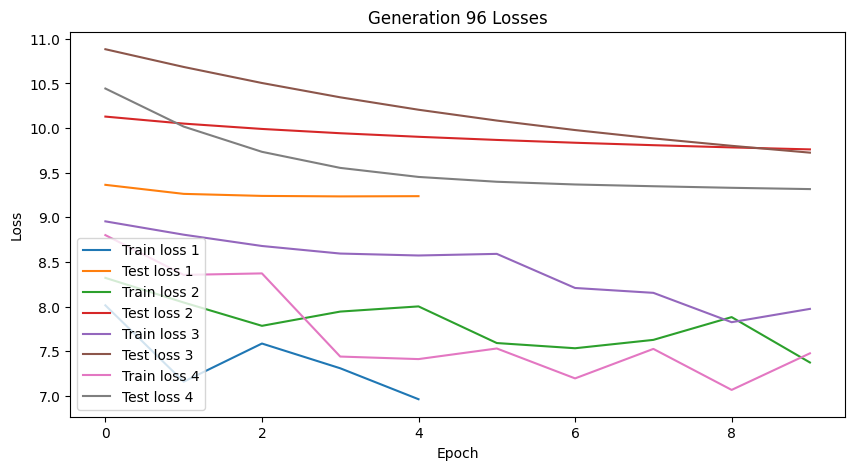

Generation 96, Best Fitness: -10.0763

Generation 97
[[1, 4, 1], [1, 2, 1], [1, 128, 1], [1, 64, 1]]


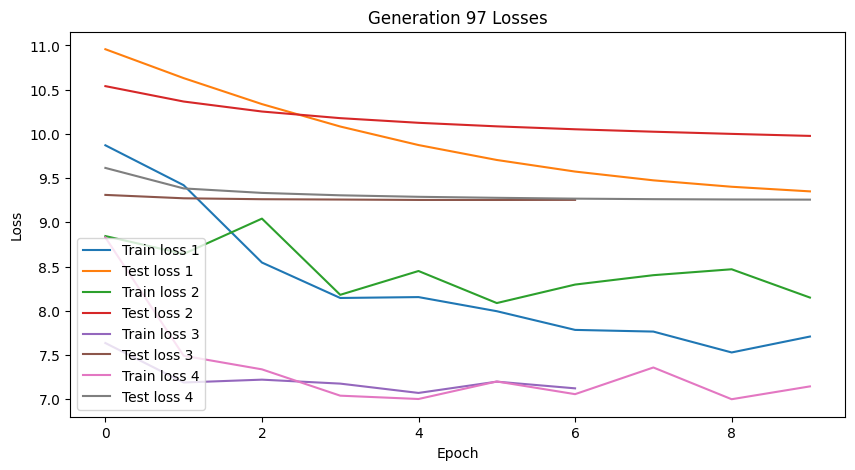

Generation 97, Best Fitness: -10.2875

Generation 98
[[1, 2, 1], [1, 128, 1], [1, 4, 1], [1, 64, 1]]


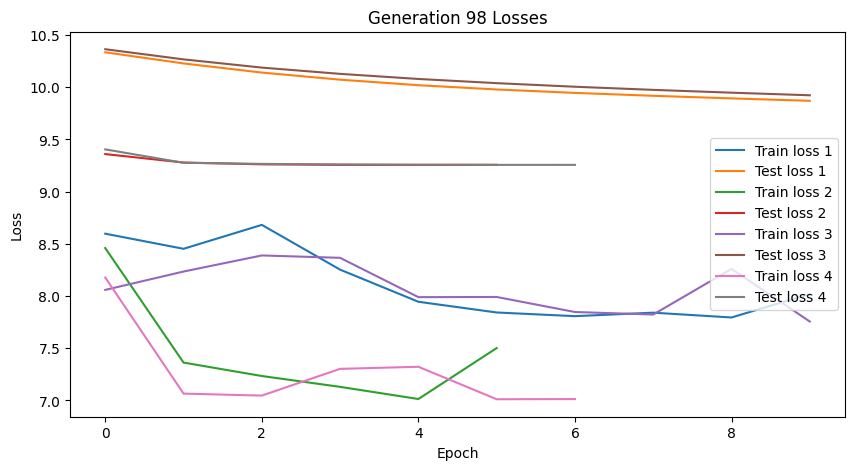

Generation 98, Best Fitness: -10.2393

Generation 99
[[1, 2, 1], [1, 4, 1], [1, 128, 1], [1, 64, 1]]


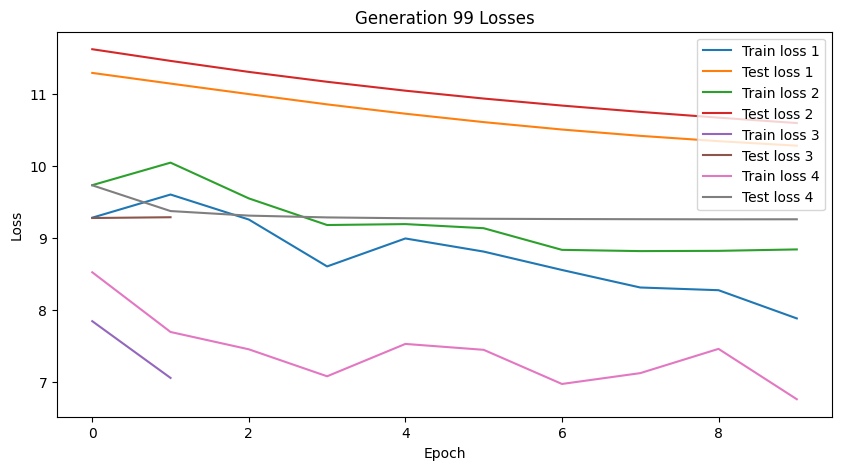

Generation 99, Best Fitness: -10.9109

Generation 100
[[1, 2, 1], [1, 4, 1], [1, 64, 1], [1, 128, 1]]


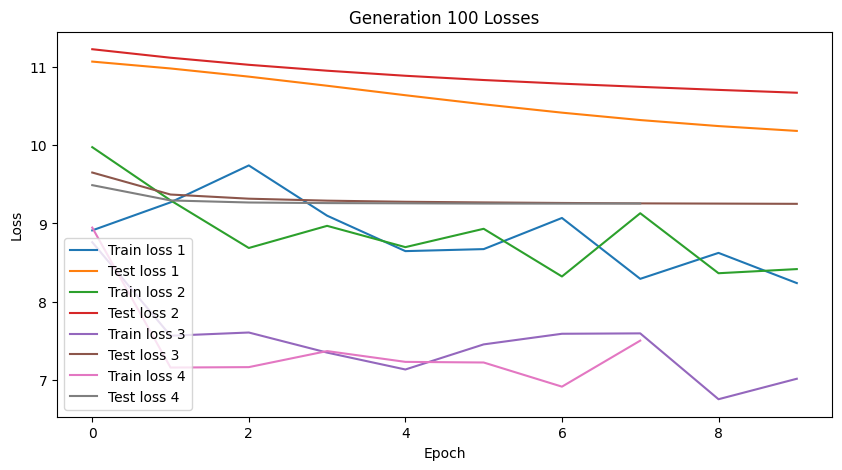

Generation 100, Best Fitness: -10.9823


In [10]:
# Initialize population
population_size = 10
input_size, output_size = 1, 1
population = [GeneticNN.random_chromosome(input_size, output_size) for _ in range(population_size)]
# print(population)

# Genetic Algorithm loop
generations = 100
for generation in range(generations):
    print(f"\nGeneration {generation + 1}")
    print(population)
    
    # Evaluate fitness for each chromosome
    fitness_scores = []
    all_train_losses = []
    all_test_losses = []
    for dna in population:
        model = GeneticNN(dna)
        optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
        fitness_score, train_losses, test_losses = model.evaluate_fitness(train_loader, test_loader, criterion, optimizer, epochs=10, patience=0)
        fitness_scores.append(fitness_score)
        all_train_losses.append(train_losses)
        all_test_losses.append(test_losses)
    
    # Plot train and test losses for each generation
    plt.figure(figsize=(10, 5))
    for i in range(len(all_train_losses)):
        plt.plot(all_train_losses[i], label=f'Train loss {i+1}')
        plt.plot(all_test_losses[i], label=f'Test loss {i+1}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Generation {generation + 1} Losses')
    plt.show()
    
    # Select parents
    parents = GeneticNN.select_parents(population, fitness_scores, num_parents=4)
    
    # Generate new population
    next_population = []
    for i in range(0, len(parents), 2):
        child1, child2 = GeneticNN.crossover(parents[i], parents[i+1])
        next_population.append(GeneticNN.mutate_chromosome(child1))
        next_population.append(GeneticNN.mutate_chromosome(child2))
    
    # Replace population with next generation
    population = next_population[:population_size]

    # Print best fitness of the generation
    print(f"Generation {generation + 1}, Best Fitness: {min(fitness_scores):.4f}")